# WK8 Exploratory Data Analysis <hr style="border:2.5px solid #126782"></hr>

Name: **Ely John C. Punzalan** <br>
Course: **CPE2A**

# Setting Up the Data File

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [165]:
df = df.drop(df.columns[[10,11,12]], axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


In [166]:
df_working = df.copy()
df_working

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.000000,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.000000,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.000000,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.000000,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.000000,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


# I. CPU and GPU Market Overview 
<i>Provide a comprehensive analysis of the CPU and GPU market landscape, highlighting production trends and volumes by vendor and foundry.</i>
<hr>

## A. Chip Distribution by Vendor (CPU and GPU)

### i. Distribution of CPUs by Vendor

In [167]:
df_vendor_cpu = df_working[df_working['Type']=='CPU'].dropna()
cpu_vendor_count = df_vendor_cpu['Vendor'].value_counts()
cpu_vendor_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

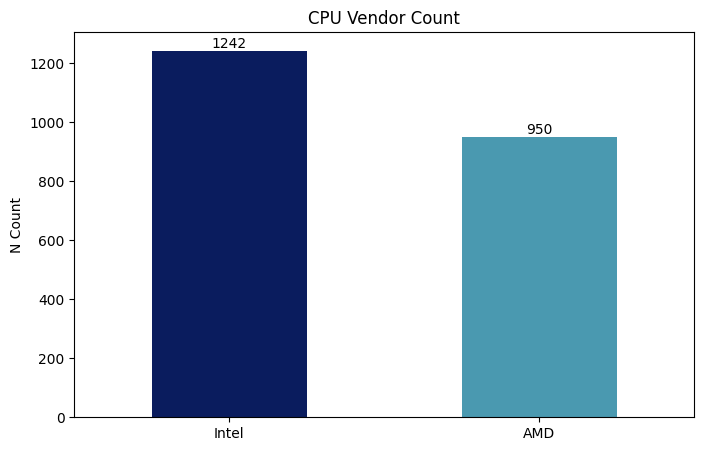

In [168]:
chart = cpu_vendor_count.plot(kind='bar',figsize=(8,5), 
        color = ['#0A1C5E','#4A99B0'])
plt.title('CPU Vendor Count')
plt.ylabel('N Count')
chart.set_xticklabels(cpu_vendor_count.index, rotation=0)
chart.bar_label(chart.containers[0], label_type='edge')
plt.xlabel('')
plt.show()

### ii. Distribution of GPUs by Vendor

In [169]:
df_vendor_gpu = df_working[df_working['Type']=='GPU'].dropna()
gpu_vendor_count = df_vendor_gpu['Vendor'].value_counts()
gpu_vendor_count

Vendor
NVIDIA    1197
AMD        712
ATI        532
Intel      150
Other       62
Name: count, dtype: int64

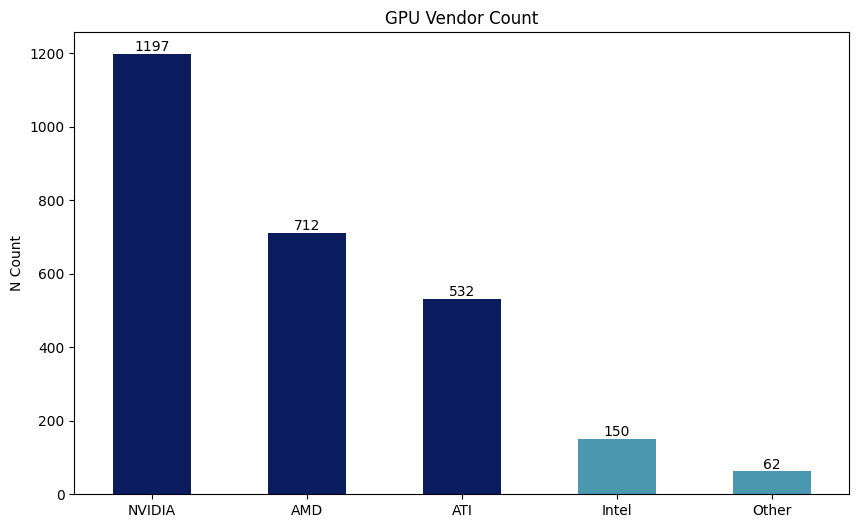

In [170]:
chart = gpu_vendor_count.plot(kind='bar',
        color = ['#0A1C5E','#0A1C5E','#0A1C5E','#4A99B0','#4A99B0'],
        figsize=(10,6))
plt.title('GPU Vendor Count')
plt.ylabel('N Count')
chart.set_xticklabels(gpu_vendor_count.index, rotation=0)
chart.bar_label(chart.containers[0], label_type='edge')
plt.xlabel('')
plt.show()

## B. Chip Production Volumes (CPU and GPU)

### i. CPU+GPU Chip Production Volume by Foundry 

In [171]:
chip_f_count = df_working['Foundry'].value_counts()
chip_f_count

Foundry
TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

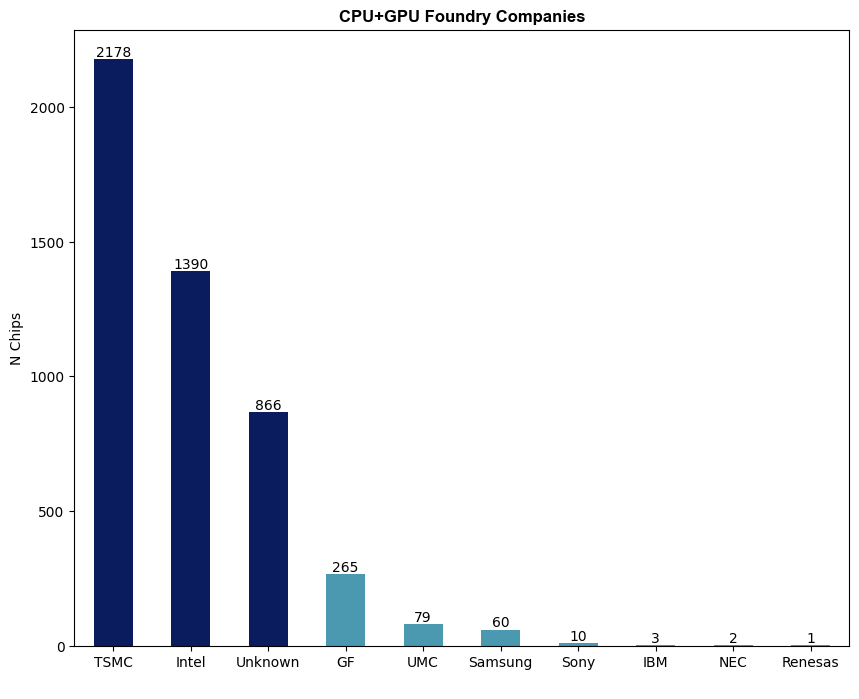

In [172]:
chart = chip_f_count.plot(
    kind='bar',
    color = ['#0A1C5E','#0A1C5E','#0A1C5E','#4A99B0','#4A99B0'
             ,'#4A99B0','#4A99B0','#4A99B0','#4A99B0','#4A99B0'],
    figsize= (10,8))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('CPU+GPU Foundry Companies', fontfamily= 'Arial', 
          fontsize = 12, fontweight= 'bold')
plt.xlabel(' ')
chart.set_xticklabels(chip_f_count.index, rotation = 0)
plt.ylabel('N Chips')
plt.show()

### ii. CPU Production by Foundry

In [173]:
df_fcpu = df_working[['Product', 'Type', 'Foundry']].where(df_working['Type'] == 'CPU').dropna()
df_fcpu

,Product,Type,Foundry
0,AMD Athlon 64 3500+,CPU,Unknown
1,AMD Athlon 200GE,CPU,Unknown
2,Intel Core i5-1145G7,CPU,Intel
3,Intel Xeon E5-2603 v2,CPU,Intel
4,AMD Phenom II X4 980 BE,CPU,Unknown
...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,Intel
2188,AMD Ryzen 9 4900H,CPU,TSMC
2189,Intel Core 2 Duo E6550,CPU,Intel
2190,AMD Opteron 246,CPU,Unknown


In [174]:
cpu_fcount = df_fcpu['Foundry'].value_counts()
cpu_fcount

Foundry
Intel      1242
Unknown     760
TSMC         97
GF           93
Name: count, dtype: int64

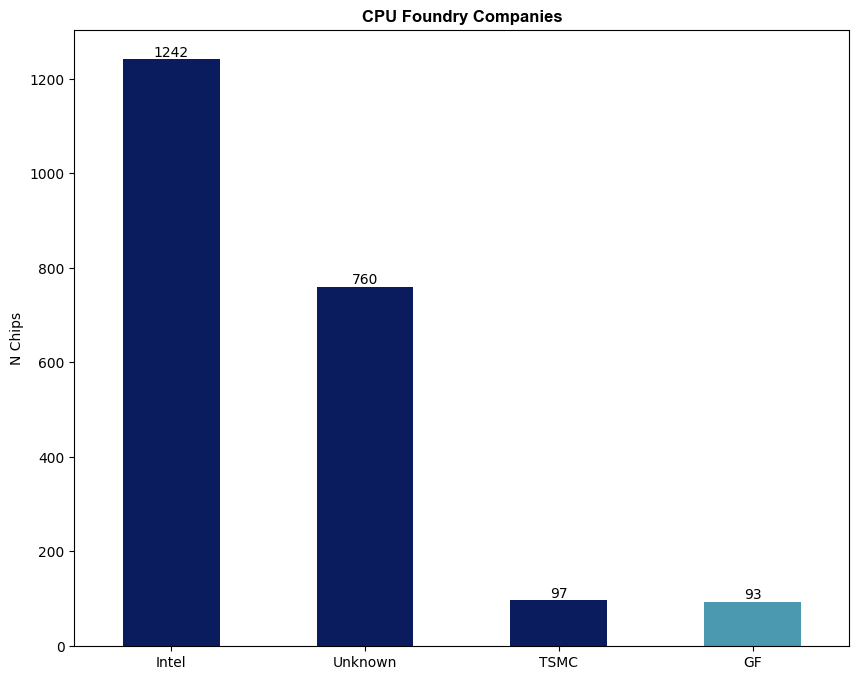

In [175]:
chart = cpu_fcount.plot(
    kind='bar',
    color = ['#0A1C5E','#0A1C5E','#0A1C5E','#4A99B0','#4A99B0'],
    figsize= (10,8))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('CPU Foundry Companies', fontfamily= 'Arial', 
          fontsize = 12, fontweight= 'bold')
plt.xlabel(' ')
chart.set_xticklabels(cpu_fcount.index, rotation = 0)
plt.ylabel('N Chips')
plt.show()


### iii. GPU Production by Foundry

In [176]:
df_fgpu = df_working[['Product', 'Type', 'Foundry']].where(df_working['Type'] == 'GPU').dropna()
df_fgpu

,Product,Type,Foundry
2192,Intel Xeon E3-1275,GPU,Intel
2193,Matrox Parhelia 128 MB,GPU,UMC
2194,NVIDIA GeForce MX150 GP107,GPU,Samsung
2195,Intel GMA 500,GPU,Intel
2196,ATI Radeon HD 4350 AGP,GPU,TSMC
...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,TSMC
4850,Intel GMA 950,GPU,Intel
4851,NVIDIA GeForce GT 320M,GPU,TSMC
4852,NVIDIA GeForce FX 5200,GPU,TSMC


In [177]:
gpu_fcount = df_fgpu['Foundry'].value_counts()
gpu_fcount

Foundry
TSMC       2081
GF          172
Intel       148
Unknown     106
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

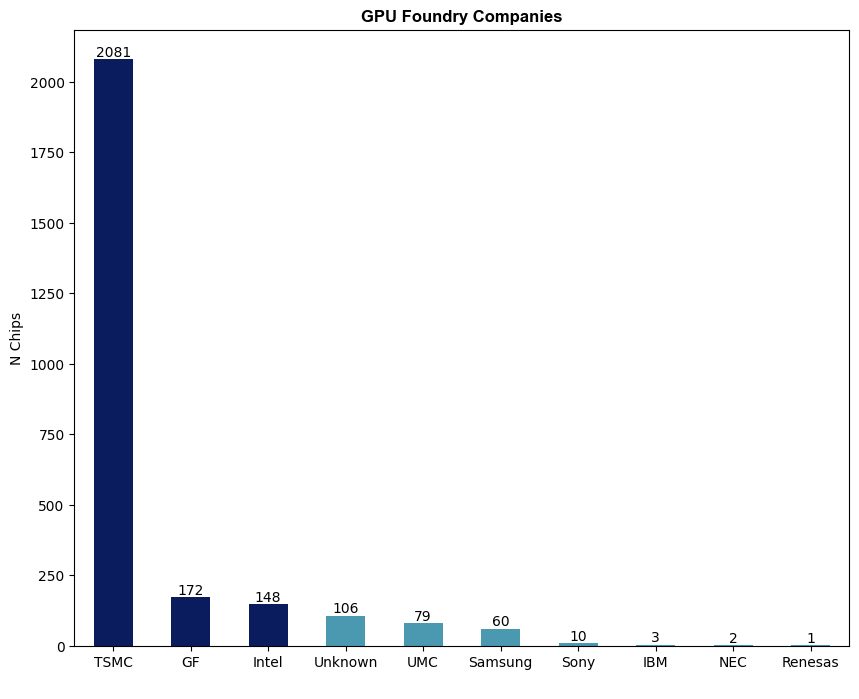

In [178]:
chart = gpu_fcount.plot(
    kind='bar',
    color = ['#0A1C5E','#0A1C5E','#0A1C5E','#4A99B0','#4A99B0','#4A99B0','#4A99B0'
             ,'#4A99B0','#4A99B0','#4A99B0'],
    figsize= (10,8))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('GPU Foundry Companies', fontfamily= 'Arial', 
          fontsize = 12, fontweight= 'bold')
plt.xlabel(' ')
chart.set_xticklabels(gpu_fcount.index, rotation = 0)
plt.ylabel('N Chips')
plt.show()

## C. Vendor-Based Market Trend

### i. CPU Analysis

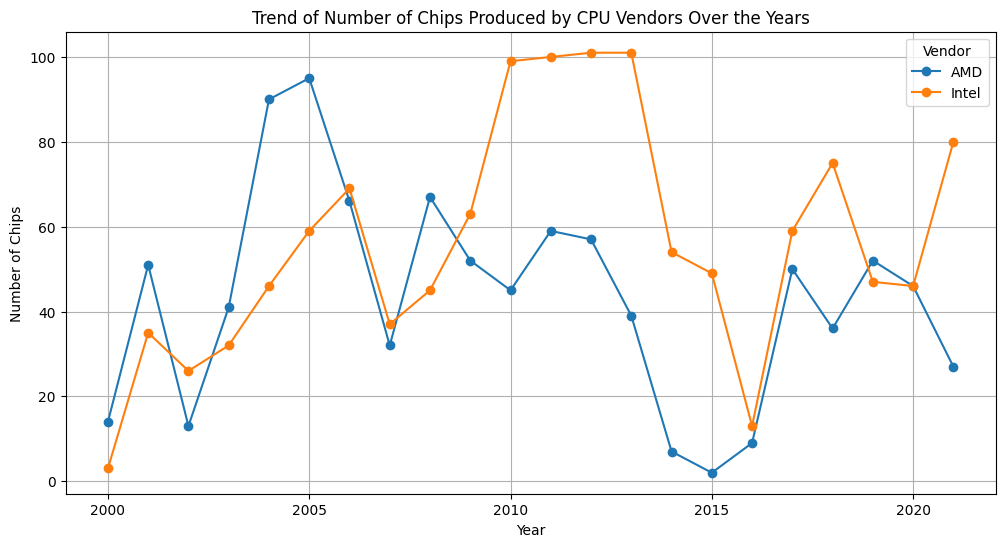

In [179]:
df_vendor_cpu['Year'] = pd.to_datetime(df_vendor_cpu['Date']).dt.year
cpu_vendor_trend = df_vendor_cpu.groupby(['Year', 'Vendor']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for vendor in cpu_vendor_trend.columns:
    plt.plot(cpu_vendor_trend.index, cpu_vendor_trend[vendor], marker='o', label=vendor)

plt.title('Trend of Number of Chips Produced by CPU Vendors Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Chips')
plt.legend(title='Vendor')
plt.grid(True)
plt.show()

### ii. GPU Analysis

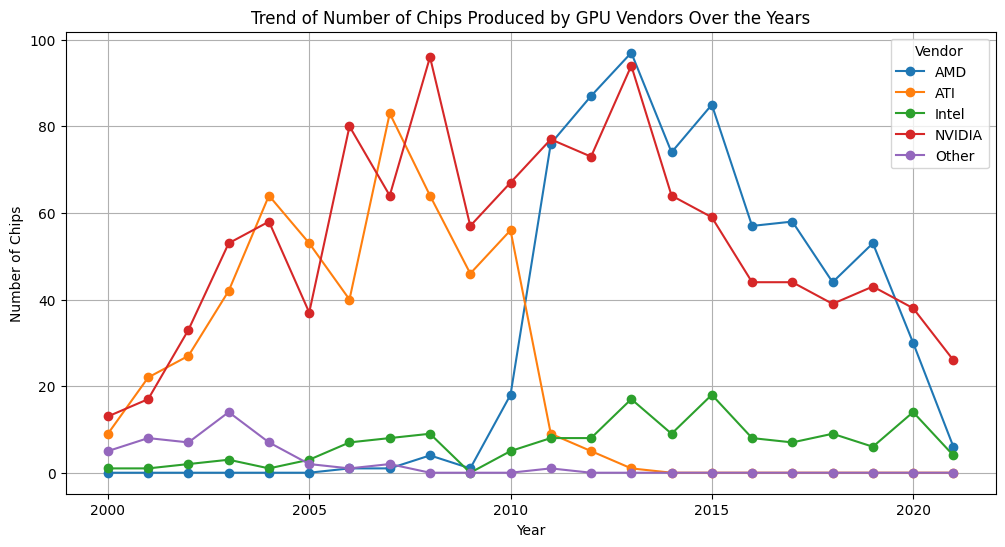

In [180]:
df_vendor_gpu['Year'] = pd.to_datetime(df_vendor_gpu['Date']).dt.year
gpu_vendor_trend = df_vendor_gpu.groupby(['Year', 'Vendor']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for vendor in gpu_vendor_trend.columns:
    plt.plot(gpu_vendor_trend.index, gpu_vendor_trend[vendor], marker='o', label=vendor)

plt.title('Trend of Number of Chips Produced by GPU Vendors Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Chips')
plt.legend(title='Vendor')
plt.grid(True)
plt.show()

## D. Foundry-Based Production Trend

### i. CPU Analysis

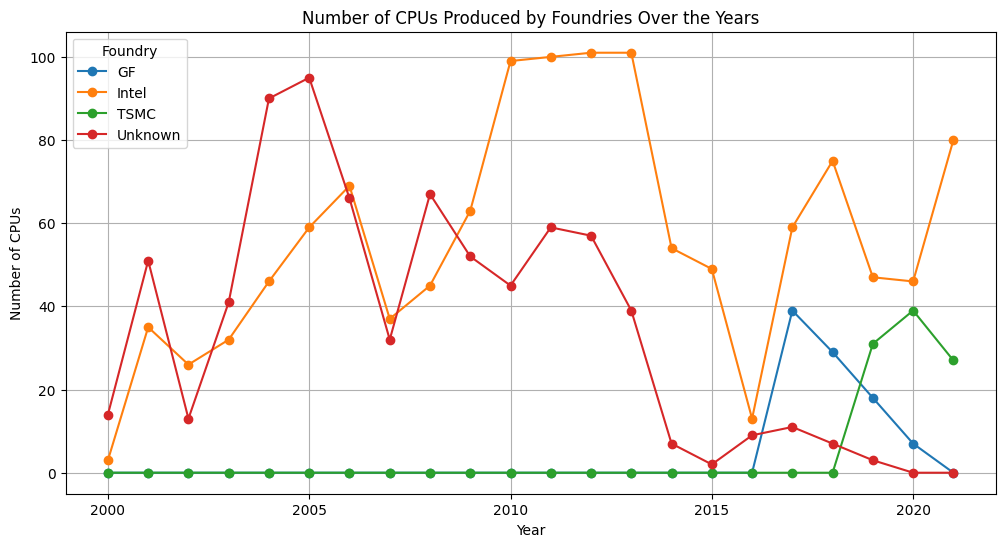

In [181]:
df_vendor_cpu['Year'] = pd.to_datetime(df_vendor_cpu['Date']).dt.year
cpu_foundry_trend = df_vendor_cpu.groupby(['Year', 'Foundry']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for foundry in cpu_foundry_trend.columns:
    plt.plot(cpu_foundry_trend.index, cpu_foundry_trend[foundry], marker='o', label=foundry)

plt.title('Number of CPUs Produced by Foundries Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of CPUs')
plt.legend(title='Foundry')
plt.grid(True)
plt.show()

### ii. GPU Analysis

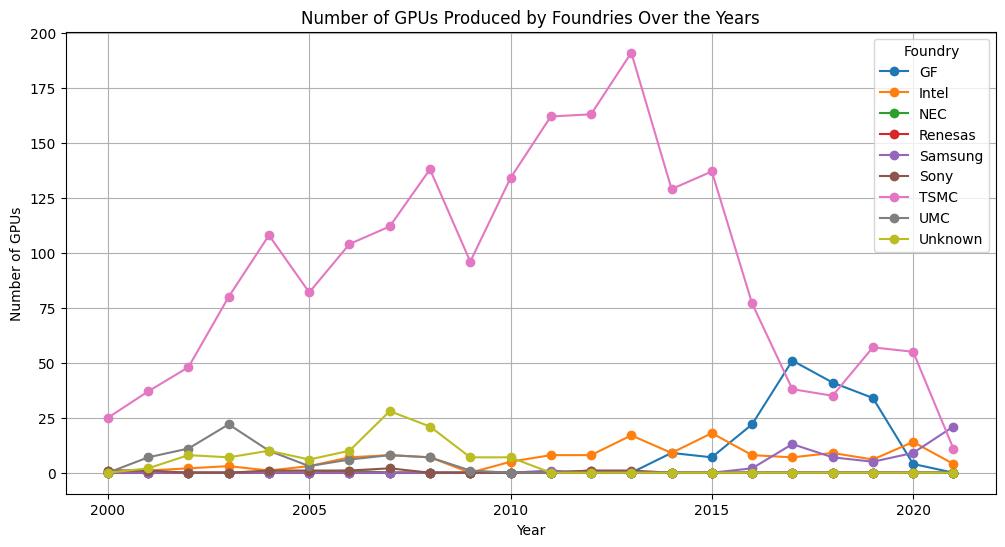

In [182]:
df_vendor_gpu['Year'] = pd.to_datetime(df_vendor_gpu['Date']).dt.year
gpu_foundry_trend = df_vendor_gpu.groupby(['Year', 'Foundry']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for foundry in gpu_foundry_trend.columns:
    plt.plot(gpu_foundry_trend.index, gpu_foundry_trend[foundry], marker='o', label=foundry)

plt.title('Number of GPUs Produced by Foundries Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of GPUs')
plt.legend(title='Foundry')
plt.grid(True)
plt.show()

# II. Thermal Design Power Market Analysis
<i>Evaluate the Thermal Design Power (TDP) characteristics of CPUs and GPUs to understand power consumption patterns, efficiency, and thermal characteristics.</i>
<hr>

## A. TDP Distribution in CPU

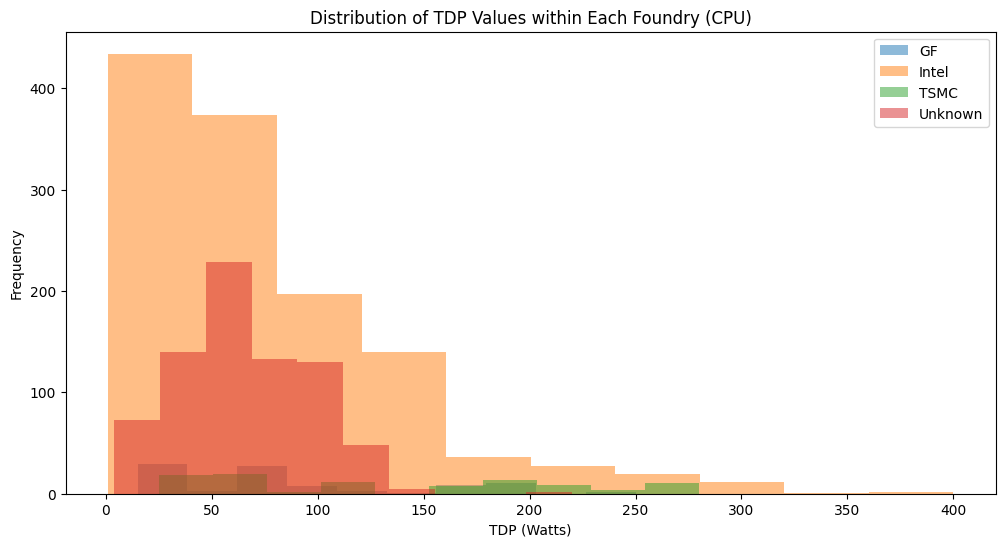

In [183]:
plt.figure(figsize=(12, 6))
df_cpu = df_working[df_working['Type'] == 'CPU']
df_cpu.groupby('Foundry')['TDP'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of TDP Values within Each Foundry (CPU)')
plt.xlabel('TDP (Watts)')
plt.ylabel('Frequency')
plt.show()

## B. TDP Distribution in GPU

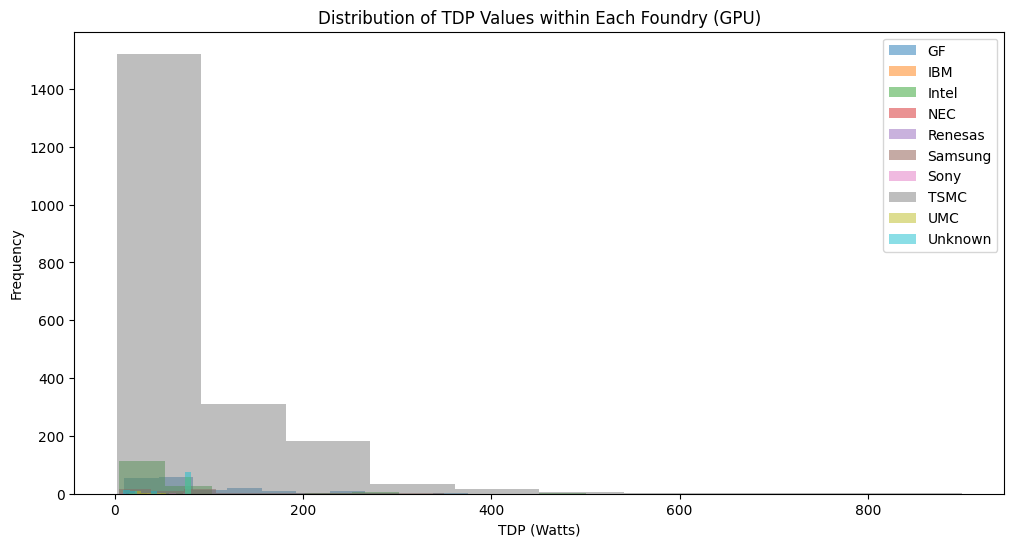

In [184]:
plt.figure(figsize=(12, 6))
df_gpu = df_working[df_working['Type'] == 'GPU']
df_gpu.groupby('Foundry')['TDP'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of TDP Values within Each Foundry (GPU)')
plt.xlabel('TDP (Watts)')
plt.ylabel('Frequency')
plt.show()

# III. Trend Analysis in CPU and GPU Production
<i>Investigate key trends in CPU and GPU production over time, highlighting advancements in semiconductor manufacturing and design.</i>
<hr>

## A. Process Size Trends
<i>Brief Description</i>

<hr style="color: white">

### i. CPU Process Size Analysis
<hr>

Step 1. Getting the required data for GPU trend analysis of processor size.

In [185]:
df_ps_cpu = df_working[['Product', 'Type', 'Process_Size', 'Date']].where(df_working['Type'] == 'CPU').dropna()
df_ps_cpu

,Product,Type,Process_Size,Date
0,AMD Athlon 64 3500+,CPU,65.0,2/20/2007
1,AMD Athlon 200GE,CPU,14.0,9/6/2018
2,Intel Core i5-1145G7,CPU,10.0,9/2/2020
3,Intel Xeon E5-2603 v2,CPU,22.0,9/1/2013
4,AMD Phenom II X4 980 BE,CPU,45.0,5/3/2011
...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,10.0,4/6/2021
2188,AMD Ryzen 9 4900H,CPU,7.0,3/16/2020
2189,Intel Core 2 Duo E6550,CPU,65.0,7/1/2007
2190,AMD Opteron 246,CPU,90.0,12/1/2004


Step 2. Convert to datetime format and fetch the year.

In [186]:
df_ps_cpu['Date'] = pd.to_datetime(df_ps_cpu['Date'])
df_ps_cpu['Year'] = df_ps_cpu['Date'].dt.year
df_ps_cpu 

,Product,Type,Process_Size,Date,Year
0,AMD Athlon 64 3500+,CPU,65.0,2007-02-20,2007.0
1,AMD Athlon 200GE,CPU,14.0,2018-09-06,2018.0
2,Intel Core i5-1145G7,CPU,10.0,2020-09-02,2020.0
3,Intel Xeon E5-2603 v2,CPU,22.0,2013-09-01,2013.0
4,AMD Phenom II X4 980 BE,CPU,45.0,2011-05-03,2011.0
...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,10.0,2021-04-06,2021.0
2188,AMD Ryzen 9 4900H,CPU,7.0,2020-03-16,2020.0
2189,Intel Core 2 Duo E6550,CPU,65.0,2007-07-01,2007.0
2190,AMD Opteron 246,CPU,90.0,2004-12-01,2004.0


Step 3. Group and sort the data by year.

In [187]:
df_ps_cpu = df_ps_cpu.groupby('Year')['Process_Size'].mean().reset_index()
df_ps_cpu

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


Step 4. Plotting the data trend

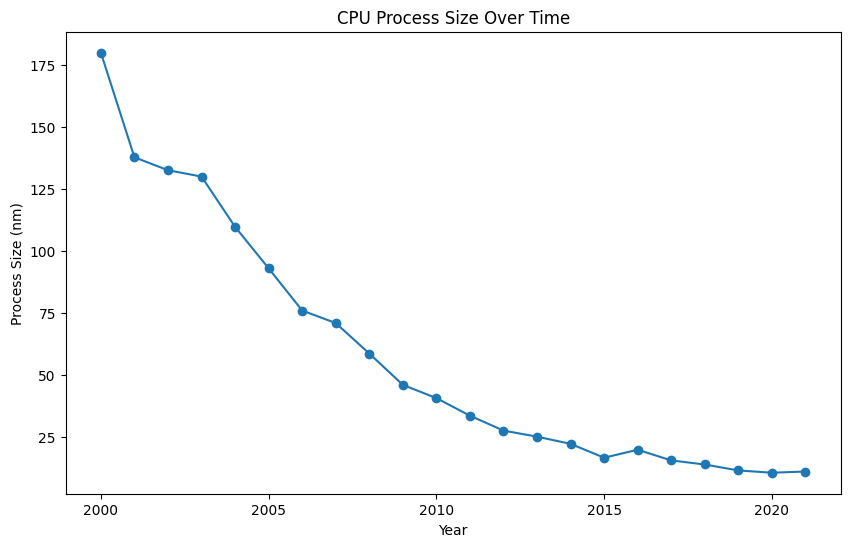

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(df_ps_cpu['Year'], df_ps_cpu['Process_Size'], marker='o')
plt.title('CPU Process Size Over Time')
plt.ylabel('Process Size (nm)')
plt.xlabel('Year')
plt.show()

### ii. GPU Process Size Analysis <hr>

Step 1. Getting the required data for CPU trend analysis of processor size.

In [189]:
df_ps_gpu = df_working[['Product', 'Type', 'Process_Size', 'Date']].where(df_working['Type'] == 'GPU').dropna()
df_ps_gpu

,Product,Type,Process_Size,Date
2192,Intel Xeon E3-1275,GPU,32.0,4/3/2011
2193,Matrox Parhelia 128 MB,GPU,150.0,6/25/2002
2194,NVIDIA GeForce MX150 GP107,GPU,14.0,2/23/2019
2195,Intel GMA 500,GPU,130.0,3/2/2008
2196,ATI Radeon HD 4350 AGP,GPU,55.0,9/30/2008
...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,40.0,2/22/2011
4850,Intel GMA 950,GPU,90.0,6/1/2005
4851,NVIDIA GeForce GT 320M,GPU,40.0,3/3/2010
4852,NVIDIA GeForce FX 5200,GPU,150.0,3/6/2003


Step 2. Convert to datetime format and fetch the year.

In [190]:
df_ps_gpu['Date'] = pd.to_datetime(df_ps_gpu['Date'])
df_ps_gpu['Year'] = df_ps_gpu['Date'].dt.year
df_ps_gpu

,Product,Type,Process_Size,Date,Year
2192,Intel Xeon E3-1275,GPU,32.0,2011-04-03,2011.0
2193,Matrox Parhelia 128 MB,GPU,150.0,2002-06-25,2002.0
2194,NVIDIA GeForce MX150 GP107,GPU,14.0,2019-02-23,2019.0
2195,Intel GMA 500,GPU,130.0,2008-03-02,2008.0
2196,ATI Radeon HD 4350 AGP,GPU,55.0,2008-09-30,2008.0
...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,40.0,2011-02-22,2011.0
4850,Intel GMA 950,GPU,90.0,2005-06-01,2005.0
4851,NVIDIA GeForce GT 320M,GPU,40.0,2010-03-03,2010.0
4852,NVIDIA GeForce FX 5200,GPU,150.0,2003-03-06,2003.0


Step 3. Group and sort the data by year.

In [191]:
df_ps_gpu = df_ps_gpu.groupby('Year')['Process_Size'].mean().reset_index()
df_ps_gpu

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


Step 4. Plotting the data trend

Text(0, 0.5, 'Process Size (nm)')

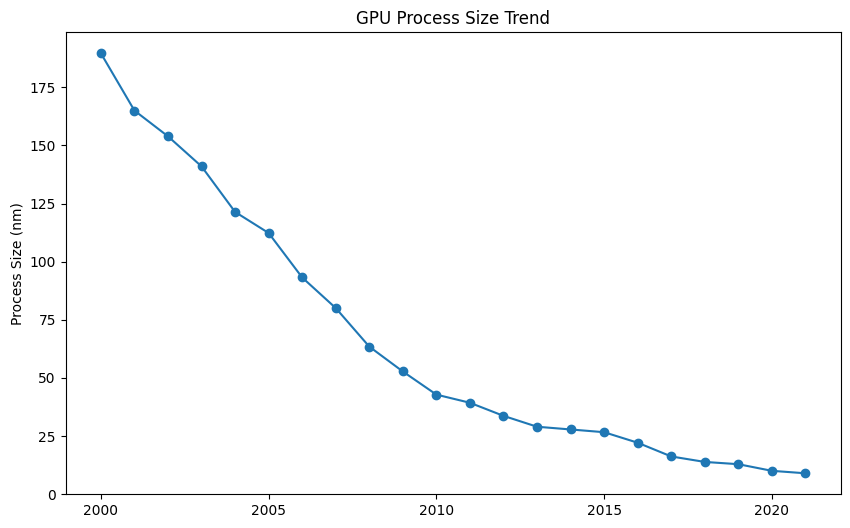

In [192]:
plt.figure(figsize=(10, 6))
plt.title('GPU Process Size Trend')
plt.plot(df_ps_gpu['Year'], df_ps_gpu['Process_Size'], marker='o')
plt.ylabel('Process Size (nm)')

## B. Die Size, Transistor Count, and Transistor Density Trend 
<i>Brief Description</i>
<hr>

### i. CPU Analysis

#### a. CPU Die Size

Step 1. Get the die size dataset for all GPU products.

In [193]:
df_ds_cpu = df_working[['Product', 'Type', 'Die_Size', 'Date']].where(df_working['Type'] == 'CPU').dropna()
df_ds_cpu.head()

,Product,Type,Die_Size,Date
0,AMD Athlon 64 3500+,CPU,77.000000,2/20/2007
1,AMD Athlon 200GE,CPU,192.000000,9/6/2018
2,Intel Core i5-1145G7,CPU,188.440445,9/2/2020
3,Intel Xeon E5-2603 v2,CPU,160.000000,9/1/2013
4,AMD Phenom II X4 980 BE,CPU,258.000000,5/3/2011


Step 2. Convert to datetime format and fetch the year.

In [194]:
df_ds_cpu['Date'] = pd.to_datetime(df_ds_cpu['Date'])
df_ds_cpu['Year'] = df_ds_cpu['Date'].dt.year
df_ds_cpu.head()

,Product,Type,Die_Size,Date,Year
0,AMD Athlon 64 3500+,CPU,77.000000,2007-02-20,2007.0
1,AMD Athlon 200GE,CPU,192.000000,2018-09-06,2018.0
2,Intel Core i5-1145G7,CPU,188.440445,2020-09-02,2020.0
3,Intel Xeon E5-2603 v2,CPU,160.000000,2013-09-01,2013.0
4,AMD Phenom II X4 980 BE,CPU,258.000000,2011-05-03,2011.0


Step 3. Group and sort the data by year.

In [195]:
df_ds_cpu = df_ds_cpu.groupby('Year')['Die_Size'].mean().reset_index()
df_ds_cpu

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


Step 4. Plotting the data

Text(0, 0.5, 'Die Size (mm^2)')

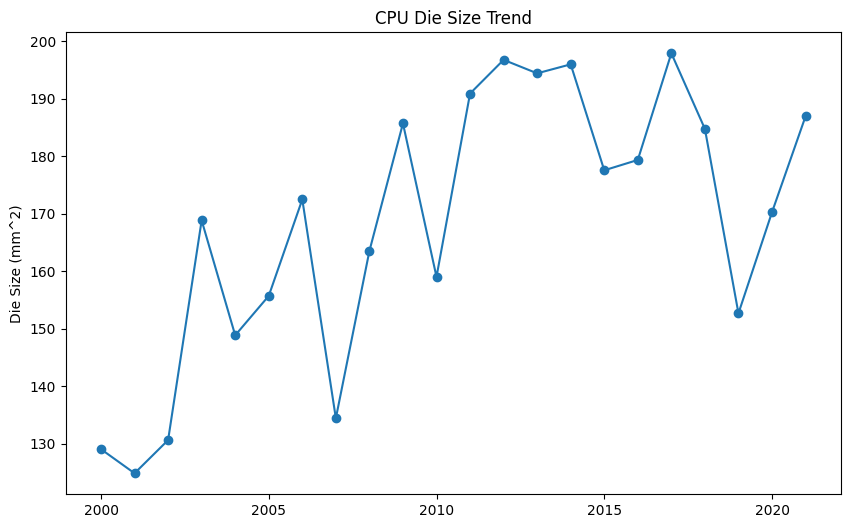

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(df_ds_cpu['Year'], df_ds_cpu['Die_Size'], marker = 'o')
plt.title('CPU Die Size Trend')
plt.ylabel('Die Size (mm^2)')

#### b. CPU Transistor Count

Step 1. Get the transistor count dataset for all GPU products.

In [197]:
df_tc_cpu = df_working[['Product', 'Type', 'Transistors', 'Date']].where(df_working['Type'] == 'CPU').dropna()
df_tc_cpu.head()

,Product,Type,Transistors,Date
0,AMD Athlon 64 3500+,CPU,122.000000,2/20/2007
1,AMD Athlon 200GE,CPU,4800.000000,9/6/2018
2,Intel Core i5-1145G7,CPU,1929.922279,9/2/2020
3,Intel Xeon E5-2603 v2,CPU,1400.000000,9/1/2013
4,AMD Phenom II X4 980 BE,CPU,758.000000,5/3/2011


Step 2. Convert to datetime format and fetch the year.

In [198]:
df_tc_cpu['Date'] = pd.to_datetime(df_tc_cpu['Date'])
df_tc_cpu['Year'] = df_tc_cpu['Date'].dt.year
df_tc_cpu.head()

,Product,Type,Transistors,Date,Year
0,AMD Athlon 64 3500+,CPU,122.000000,2007-02-20,2007.0
1,AMD Athlon 200GE,CPU,4800.000000,2018-09-06,2018.0
2,Intel Core i5-1145G7,CPU,1929.922279,2020-09-02,2020.0
3,Intel Xeon E5-2603 v2,CPU,1400.000000,2013-09-01,2013.0
4,AMD Phenom II X4 980 BE,CPU,758.000000,2011-05-03,2011.0


Step 3. Group and sort the data by year.

In [199]:
df_tc_cpu = df_tc_cpu.groupby('Year')['Transistors'].mean().reset_index()
df_tc_cpu

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


Step 4. Plotting the data

Text(0, 0.5, 'Transistor Count')

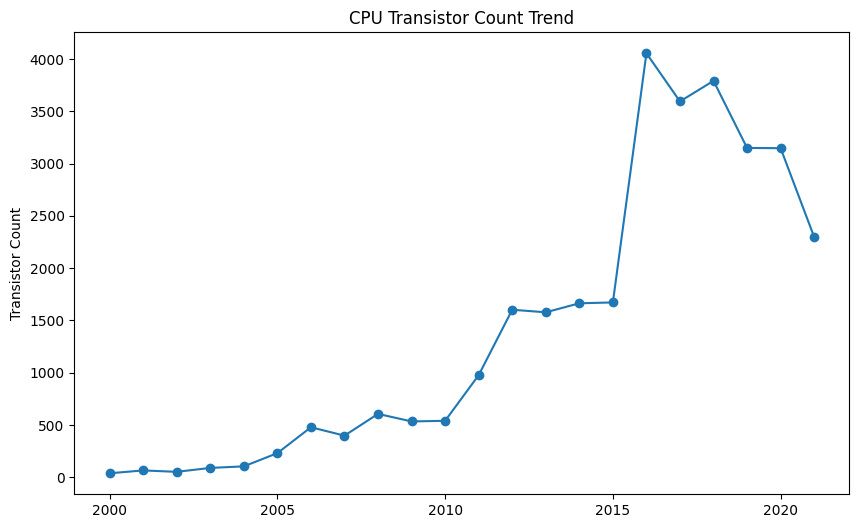

In [200]:
plt.figure(figsize=(10, 6))
plt.plot(df_tc_cpu['Year'], df_tc_cpu['Transistors'], marker='o')
plt.title('CPU Transistor Count Trend')
plt.ylabel('Transistor Count')


#### c. CPU Transistor Density 

Step 1. Getting the die size and transistor count dataset for all GPU products. Provide a separate copy for transistor density trend.

In [201]:
df_tdensity_cpu = df_working[['Product', 'Type', 'Die_Size','Transistors', 'Date']].where(df_working['Type'] == 'CPU').dropna()
df_tdensity_cpu.head()

,Product,Type,Die_Size,Transistors,Date
0,AMD Athlon 64 3500+,CPU,77.000000,122.000000,2/20/2007
1,AMD Athlon 200GE,CPU,192.000000,4800.000000,9/6/2018
2,Intel Core i5-1145G7,CPU,188.440445,1929.922279,9/2/2020
3,Intel Xeon E5-2603 v2,CPU,160.000000,1400.000000,9/1/2013
4,AMD Phenom II X4 980 BE,CPU,258.000000,758.000000,5/3/2011


Step 2. Calculation of transistor density using the formula: Transistor Count / Die Size

In [202]:
df_tdensity_cpu['Transistor_Density'] = df_tdensity_cpu['Transistors'] / df_tdensity_cpu['Die_Size']
df_tdensity_cpu.head()

,Product,Type,Die_Size,Transistors,Date,Transistor_Density
0,AMD Athlon 64 3500+,CPU,77.000000,122.000000,2/20/2007,1.584416
1,AMD Athlon 200GE,CPU,192.000000,4800.000000,9/6/2018,25.000000
2,Intel Core i5-1145G7,CPU,188.440445,1929.922279,9/2/2020,10.241550
3,Intel Xeon E5-2603 v2,CPU,160.000000,1400.000000,9/1/2013,8.750000
4,AMD Phenom II X4 980 BE,CPU,258.000000,758.000000,5/3/2011,2.937984


Step 3. Convert to datetime format and fetch the year.

In [203]:
df_tdensity_cpu['Date'] = pd.to_datetime(df_tdensity_cpu['Date'])
df_tdensity_cpu['Year'] = df_tdensity_cpu['Date'].dt.year
df_tdensity_cpu.head()

,Product,Type,Die_Size,Transistors,Date,Transistor_Density,Year
0,AMD Athlon 64 3500+,CPU,77.000000,122.000000,2007-02-20,1.584416,2007.0
1,AMD Athlon 200GE,CPU,192.000000,4800.000000,2018-09-06,25.000000,2018.0
2,Intel Core i5-1145G7,CPU,188.440445,1929.922279,2020-09-02,10.241550,2020.0
3,Intel Xeon E5-2603 v2,CPU,160.000000,1400.000000,2013-09-01,8.750000,2013.0
4,AMD Phenom II X4 980 BE,CPU,258.000000,758.000000,2011-05-03,2.937984,2011.0


Step 4. Group and sort the data by year.

In [204]:
df_tdensity_cpu = df_tdensity_cpu.groupby('Year')['Transistor_Density'].mean().reset_index()
df_tdensity_cpu

,Year,Transistor_Density
0,2000.0,0.309045
1,2001.0,0.568996
2,2002.0,0.419652
3,2003.0,0.520324
4,2004.0,0.758602
5,2005.0,1.419641
6,2006.0,2.660105
7,2007.0,10.765648
8,2008.0,3.894876
9,2009.0,3.315517


Step 5. Plotting the data

Text(0, 0.5, 'Transistor Density (in M/mm^2)')

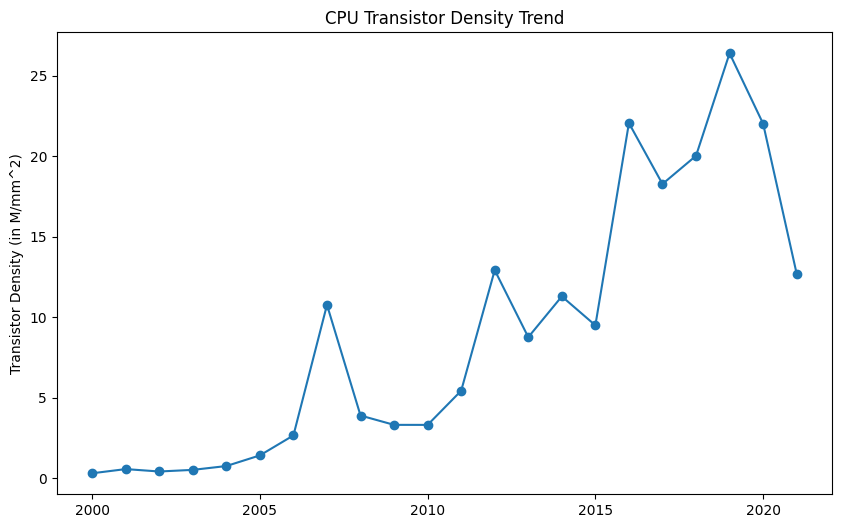

In [205]:
plt.figure(figsize=(10, 6))
plt.plot(df_tdensity_cpu['Year'], df_tdensity_cpu['Transistor_Density'], marker='o')
plt.title('CPU Transistor Density Trend')
plt.ylabel('Transistor Density (in M/mm^2)')

### ii. GPU Analysis

#### a. GPU Die Size

In [206]:
df_ds_gpu = df_working[['Product', 'Type', 'Die_Size', 'Date']].where(df_working['Type'] == 'GPU').dropna()
df_ds_gpu.head()

,Product,Type,Die_Size,Date
2192,Intel Xeon E3-1275,GPU,216.000000,4/3/2011
2193,Matrox Parhelia 128 MB,GPU,174.000000,6/25/2002
2194,NVIDIA GeForce MX150 GP107,GPU,132.000000,2/23/2019
2195,Intel GMA 500,GPU,188.440445,3/2/2008
2196,ATI Radeon HD 4350 AGP,GPU,73.000000,9/30/2008


In [207]:
df_ds_gpu['Date'] = pd.to_datetime(df_ds_gpu['Date'])
df_ds_gpu['Year'] = df_ds_gpu['Date'].dt.year
df_ds_gpu.head()

,Product,Type,Die_Size,Date,Year
2192,Intel Xeon E3-1275,GPU,216.000000,2011-04-03,2011.0
2193,Matrox Parhelia 128 MB,GPU,174.000000,2002-06-25,2002.0
2194,NVIDIA GeForce MX150 GP107,GPU,132.000000,2019-02-23,2019.0
2195,Intel GMA 500,GPU,188.440445,2008-03-02,2008.0
2196,ATI Radeon HD 4350 AGP,GPU,73.000000,2008-09-30,2008.0


In [208]:
df_ds_gpu = df_ds_gpu.groupby('Year')['Die_Size'].mean().reset_index()
df_ds_gpu

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


Text(0, 0.5, 'Die Size (mm^2)')

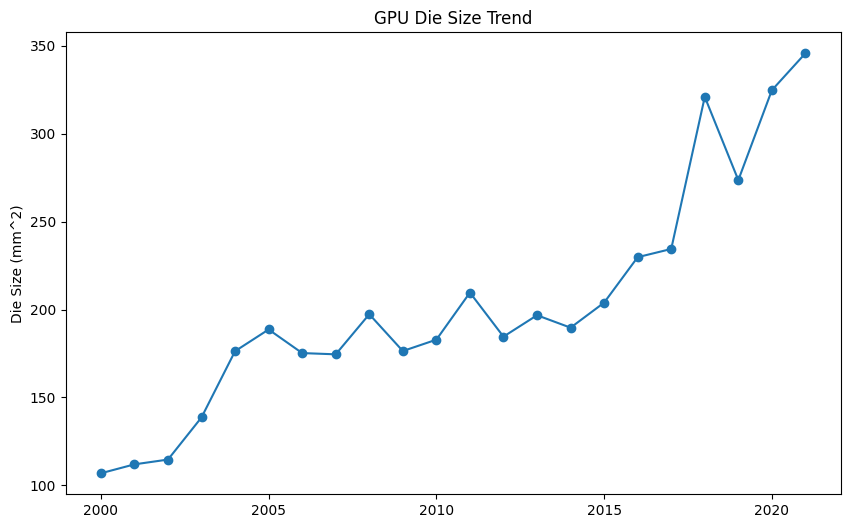

In [209]:
plt.figure(figsize=(10, 6))
plt.plot(df_ds_gpu['Year'], df_ds_gpu['Die_Size'], marker = 'o')
plt.title('GPU Die Size Trend')
plt.ylabel('Die Size (mm^2)')

#### b. GPU Transistor Count

In [210]:
df_tc_gpu = df_working[['Product', 'Type', 'Transistors', 'Date']].where(df_working['Type'] == 'GPU').dropna()
df_tc_gpu.head()

,Product,Type,Transistors,Date
2192,Intel Xeon E3-1275,GPU,1160.000000,4/3/2011
2193,Matrox Parhelia 128 MB,GPU,80.000000,6/25/2002
2194,NVIDIA GeForce MX150 GP107,GPU,3300.000000,2/23/2019
2195,Intel GMA 500,GPU,1929.922279,3/2/2008
2196,ATI Radeon HD 4350 AGP,GPU,242.000000,9/30/2008


In [211]:
df_tc_gpu['Date'] = pd.to_datetime(df_tc_gpu['Date'])
df_tc_gpu['Year'] = df_tc_gpu['Date'].dt.year
df_tc_gpu.head()

,Product,Type,Transistors,Date,Year
2192,Intel Xeon E3-1275,GPU,1160.000000,2011-04-03,2011.0
2193,Matrox Parhelia 128 MB,GPU,80.000000,2002-06-25,2002.0
2194,NVIDIA GeForce MX150 GP107,GPU,3300.000000,2019-02-23,2019.0
2195,Intel GMA 500,GPU,1929.922279,2008-03-02,2008.0
2196,ATI Radeon HD 4350 AGP,GPU,242.000000,2008-09-30,2008.0


In [212]:
df_tc_gpu = df_tc_gpu.groupby('Year')['Transistors'].mean().reset_index()
df_tc_gpu

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


Text(0, 0.5, 'Transistor Count')

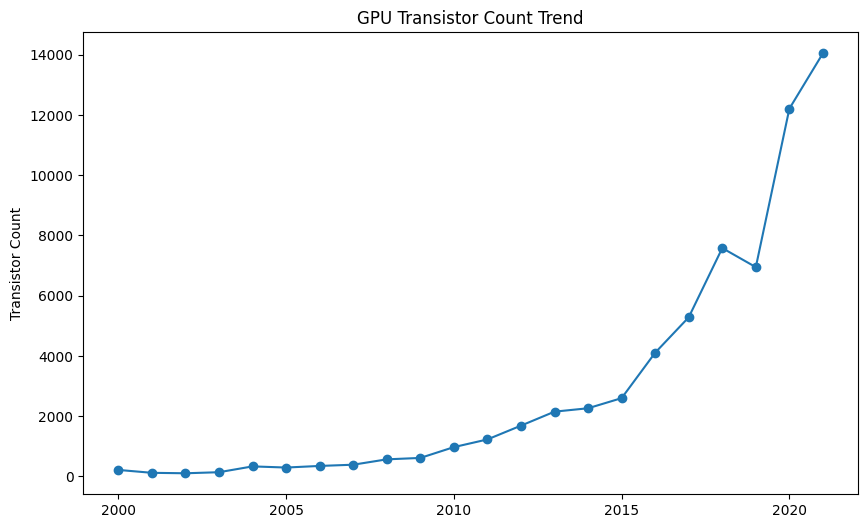

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(df_tc_gpu['Year'], df_tc_gpu['Transistors'], marker='o')
plt.title('GPU Transistor Count Trend')
plt.ylabel('Transistor Count')


#### c. GPU Transistor Density

In [214]:
df_tdensity_gpu = df_working[['Product', 'Type', 'Die_Size','Transistors', 'Date']].where(df_working['Type'] == 'GPU').dropna()
df_tdensity_gpu.head()

,Product,Type,Die_Size,Transistors,Date
2192,Intel Xeon E3-1275,GPU,216.000000,1160.000000,4/3/2011
2193,Matrox Parhelia 128 MB,GPU,174.000000,80.000000,6/25/2002
2194,NVIDIA GeForce MX150 GP107,GPU,132.000000,3300.000000,2/23/2019
2195,Intel GMA 500,GPU,188.440445,1929.922279,3/2/2008
2196,ATI Radeon HD 4350 AGP,GPU,73.000000,242.000000,9/30/2008


In [215]:
df_tdensity_gpu['Transistor_Density'] = df_tdensity_gpu['Transistors'] / df_tdensity_gpu['Die_Size']
df_tdensity_gpu.head()

,Product,Type,Die_Size,Transistors,Date,Transistor_Density
2192,Intel Xeon E3-1275,GPU,216.000000,1160.000000,4/3/2011,5.370370
2193,Matrox Parhelia 128 MB,GPU,174.000000,80.000000,6/25/2002,0.459770
2194,NVIDIA GeForce MX150 GP107,GPU,132.000000,3300.000000,2/23/2019,25.000000
2195,Intel GMA 500,GPU,188.440445,1929.922279,3/2/2008,10.241550
2196,ATI Radeon HD 4350 AGP,GPU,73.000000,242.000000,9/30/2008,3.315068


In [216]:
df_tdensity_gpu['Date'] = pd.to_datetime(df_tdensity_gpu['Date'])
df_tdensity_gpu['Year'] = df_tdensity_gpu['Date'].dt.year
df_tdensity_gpu.head()

,Product,Type,Die_Size,Transistors,Date,Transistor_Density,Year
2192,Intel Xeon E3-1275,GPU,216.000000,1160.000000,2011-04-03,5.370370,2011.0
2193,Matrox Parhelia 128 MB,GPU,174.000000,80.000000,2002-06-25,0.459770,2002.0
2194,NVIDIA GeForce MX150 GP107,GPU,132.000000,3300.000000,2019-02-23,25.000000,2019.0
2195,Intel GMA 500,GPU,188.440445,1929.922279,2008-03-02,10.241550,2008.0
2196,ATI Radeon HD 4350 AGP,GPU,73.000000,242.000000,2008-09-30,3.315068,2008.0


In [217]:
df_tdensity_gpu = df_tdensity_gpu.groupby('Year')['Transistor_Density'].mean().reset_index()
df_tdensity_gpu

,Year,Transistor_Density
0,2000.0,1.401009
1,2001.0,0.851925
2,2002.0,0.727617
3,2003.0,0.884913
4,2004.0,1.963577
5,2005.0,2.255016
6,2006.0,2.083713
7,2007.0,2.420032
8,2008.0,2.870016
9,2009.0,3.560668


Text(0, 0.5, 'Transistor Density (in M/mm^2)')

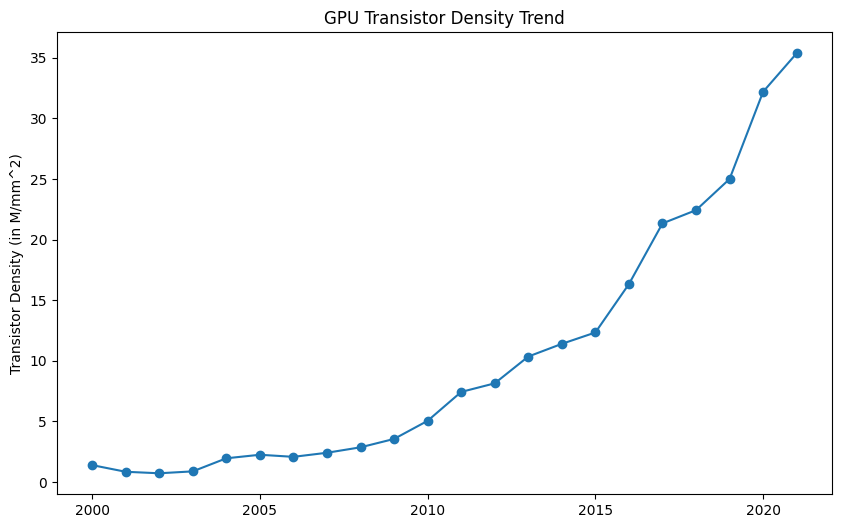

In [218]:
plt.figure(figsize=(10, 6))
plt.plot(df_tdensity_gpu['Year'], df_tdensity_gpu['Transistor_Density'], marker='o')
plt.title('GPU Transistor Density Trend')
plt.ylabel('Transistor Density (in M/mm^2)')

## C. Frequency
<i>Brief Description</i>
<hr>

### i. GPU Analysis

In [219]:
df_frq_gpu = df_working[['Product', 'Type', 'Frequency', 'Date']].where(df_working['Type'] == 'GPU').dropna()
df_frq_gpu.head()

,Product,Type,Frequency,Date
2192,Intel Xeon E3-1275,GPU,100.0,4/3/2011
2193,Matrox Parhelia 128 MB,GPU,200.0,6/25/2002
2194,NVIDIA GeForce MX150 GP107,GPU,1469.0,2/23/2019
2195,Intel GMA 500,GPU,200.0,3/2/2008
2196,ATI Radeon HD 4350 AGP,GPU,600.0,9/30/2008


In [220]:
df_frq_gpu['Date'] = pd.to_datetime(df_frq_gpu['Date'])
df_frq_gpu['Year'] = df_frq_gpu['Date'].dt.year
df_frq_gpu.head()

,Product,Type,Frequency,Date,Year
2192,Intel Xeon E3-1275,GPU,100.0,2011-04-03,2011.0
2193,Matrox Parhelia 128 MB,GPU,200.0,2002-06-25,2002.0
2194,NVIDIA GeForce MX150 GP107,GPU,1469.0,2019-02-23,2019.0
2195,Intel GMA 500,GPU,200.0,2008-03-02,2008.0
2196,ATI Radeon HD 4350 AGP,GPU,600.0,2008-09-30,2008.0


In [221]:
df_frq_gpu = df_frq_gpu.groupby('Year')['Frequency'].mean().reset_index()
df_frq_gpu

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


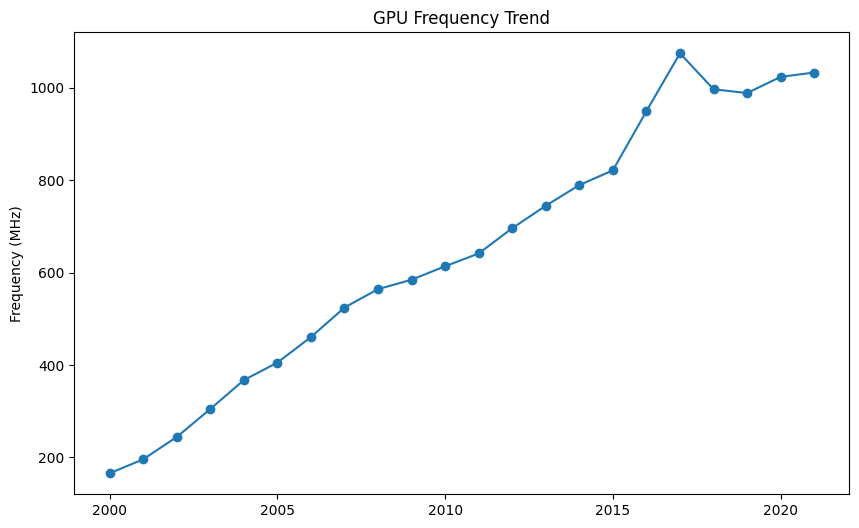

In [222]:
plt.figure(figsize=(10, 6))
plt.plot(df_frq_gpu['Year'], df_frq_gpu['Frequency'], marker='o')
plt.title('GPU Frequency Trend')
plt.ylabel('Frequency (MHz)')
plt.show()

### ii. CPU Analysis

In [223]:
df_frq_cpu = df_working[['Product', 'Type', 'Frequency', 'Date']].where(df_working['Type'] == 'CPU').dropna()
df_frq_cpu.head()

,Product,Type,Frequency,Date
0,AMD Athlon 64 3500+,CPU,2200.0,2/20/2007
1,AMD Athlon 200GE,CPU,3200.0,9/6/2018
2,Intel Core i5-1145G7,CPU,2600.0,9/2/2020
3,Intel Xeon E5-2603 v2,CPU,1800.0,9/1/2013
4,AMD Phenom II X4 980 BE,CPU,3700.0,5/3/2011


In [224]:
df_frq_cpu['Date'] = pd.to_datetime(df_frq_cpu['Date'])
df_frq_cpu['Year'] = df_frq_cpu['Date'].dt.year
df_frq_cpu.head()


,Product,Type,Frequency,Date,Year
0,AMD Athlon 64 3500+,CPU,2200.0,2007-02-20,2007.0
1,AMD Athlon 200GE,CPU,3200.0,2018-09-06,2018.0
2,Intel Core i5-1145G7,CPU,2600.0,2020-09-02,2020.0
3,Intel Xeon E5-2603 v2,CPU,1800.0,2013-09-01,2013.0
4,AMD Phenom II X4 980 BE,CPU,3700.0,2011-05-03,2011.0


In [225]:
df_frq_cpu = df_frq_cpu.groupby('Year')['Frequency'].mean().reset_index()
df_frq_cpu

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


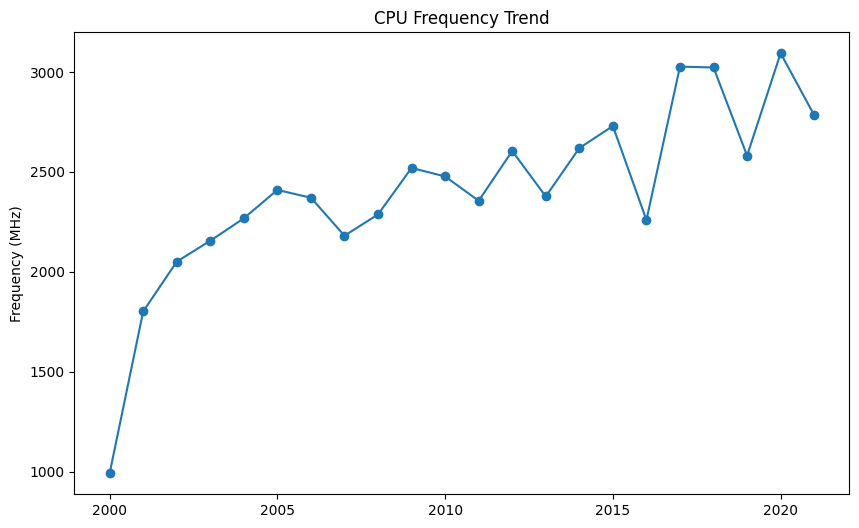

In [226]:
plt.figure(figsize=(10, 6))
plt.plot(df_frq_cpu['Year'], df_frq_cpu['Frequency'], marker='o')
plt.title('CPU Frequency Trend')
plt.ylabel('Frequency (MHz)')
plt.show()

## D. Thermal Design Power

### i. CPU Analysis

In [227]:
df_tdp_cpu = df_working[['Product', 'Type', 'TDP', 'Date']].where(df_working['Type'] == 'CPU').dropna()
df_tdp_cpu.head()

,Product,Type,TDP,Date
0,AMD Athlon 64 3500+,CPU,45.0,2/20/2007
1,AMD Athlon 200GE,CPU,35.0,9/6/2018
2,Intel Core i5-1145G7,CPU,28.0,9/2/2020
3,Intel Xeon E5-2603 v2,CPU,80.0,9/1/2013
4,AMD Phenom II X4 980 BE,CPU,125.0,5/3/2011


In [228]:
df_tdp_cpu['Date'] = pd.to_datetime(df_tdp_cpu['Date'])
df_tdp_cpu['Year'] = df_tdp_cpu['Date'].dt.year
df_tdp_cpu.head()

,Product,Type,TDP,Date,Year
0,AMD Athlon 64 3500+,CPU,45.0,2007-02-20,2007.0
1,AMD Athlon 200GE,CPU,35.0,2018-09-06,2018.0
2,Intel Core i5-1145G7,CPU,28.0,2020-09-02,2020.0
3,Intel Xeon E5-2603 v2,CPU,80.0,2013-09-01,2013.0
4,AMD Phenom II X4 980 BE,CPU,125.0,2011-05-03,2011.0


In [229]:
df_tdp_cpu = df_tdp_cpu.groupby('Year')['TDP'].mean().reset_index()
df_tdp_cpu

,Year,TDP
0,2000.0,50.470588
1,2001.0,59.186047
2,2002.0,68.487179
3,2003.0,73.630137
4,2004.0,78.250000
5,2005.0,79.525974
6,2006.0,72.822222
7,2007.0,56.608696
8,2008.0,63.589286
9,2009.0,74.426087


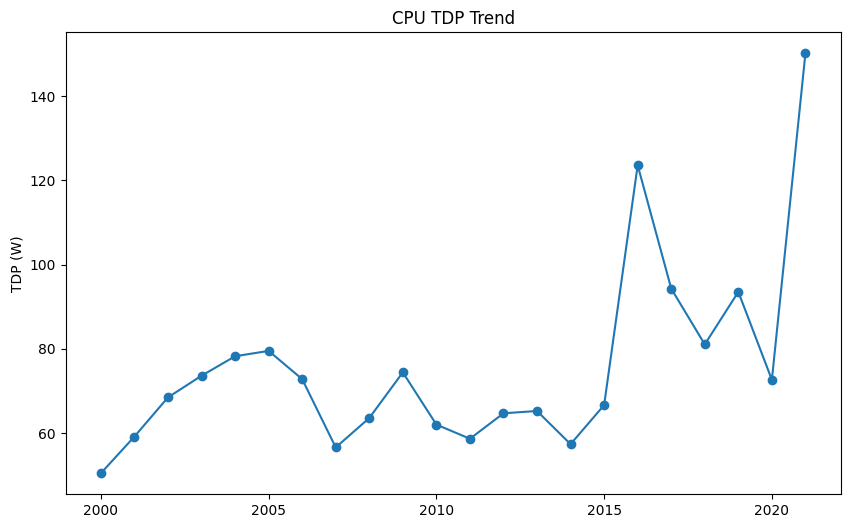

In [230]:
plt.figure(figsize=(10, 6))
plt.plot(df_tdp_cpu['Year'], df_tdp_cpu['TDP'], marker='o')
plt.title('CPU TDP Trend')
plt.ylabel('TDP (W)')
plt.show()

### ii. GPU Analysis

In [231]:
df_tdp_gpu = df_working[['Product', 'Type', 'TDP', 'Date']].where(df_working['Type'] == 'GPU').dropna()
df_tdp_gpu.head()

,Product,Type,TDP,Date
2192,Intel Xeon E3-1275,GPU,95.000000,4/3/2011
2193,Matrox Parhelia 128 MB,GPU,81.359981,6/25/2002
2194,NVIDIA GeForce MX150 GP107,GPU,25.000000,2/23/2019
2195,Intel GMA 500,GPU,81.359981,3/2/2008
2196,ATI Radeon HD 4350 AGP,GPU,20.000000,9/30/2008


In [232]:
df_tdp_gpu['Date'] = pd.to_datetime(df_tdp_gpu['Date'])
df_tdp_gpu['Year'] = df_tdp_gpu['Date'].dt.year
df_tdp_gpu.head()


,Product,Type,TDP,Date,Year
2192,Intel Xeon E3-1275,GPU,95.000000,2011-04-03,2011.0
2193,Matrox Parhelia 128 MB,GPU,81.359981,2002-06-25,2002.0
2194,NVIDIA GeForce MX150 GP107,GPU,25.000000,2019-02-23,2019.0
2195,Intel GMA 500,GPU,81.359981,2008-03-02,2008.0
2196,ATI Radeon HD 4350 AGP,GPU,20.000000,2008-09-30,2008.0


In [233]:
df_tdp_gpu = df_tdp_gpu.groupby('Year')['TDP'].mean().reset_index()
df_tdp_gpu

,Year,TDP
0,2000.0,55.258657
1,2001.0,65.297946
2,2002.0,75.419693
3,2003.0,69.121414
4,2004.0,68.908296
5,2005.0,75.262725
6,2006.0,63.032552
7,2007.0,69.652653
8,2008.0,95.534565
9,2009.0,73.114337


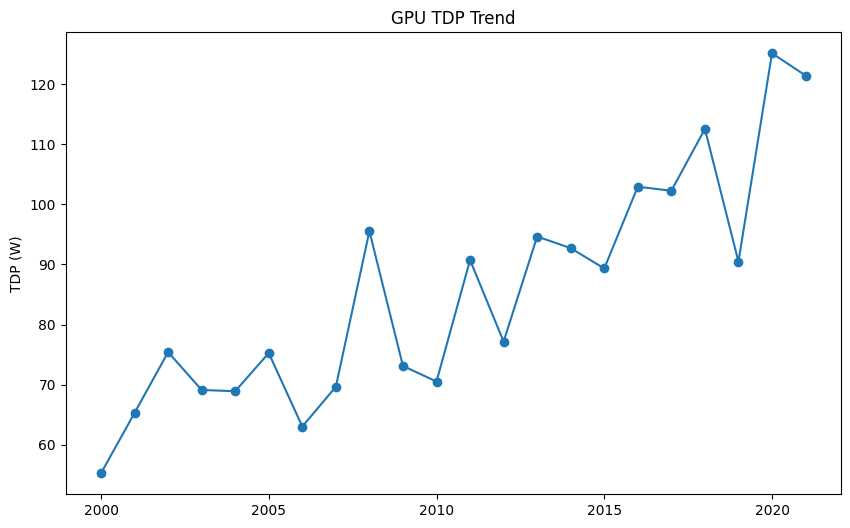

In [234]:
plt.figure(figsize=(10, 6))
plt.plot(df_tdp_gpu['Year'], df_tdp_gpu['TDP'], marker='o')
plt.title('GPU TDP Trend')
plt.ylabel('TDP (W)')
plt.show()

# IV. Correlation Analysis of CPU and GPU Parameters
<i>Explore relationships between key CPU and GPU parameters to inform design and optimization strategies.</i>
<hr>

## A. General Analysis (CPU and GPU)

### i. Frequency and Total Transistor Count

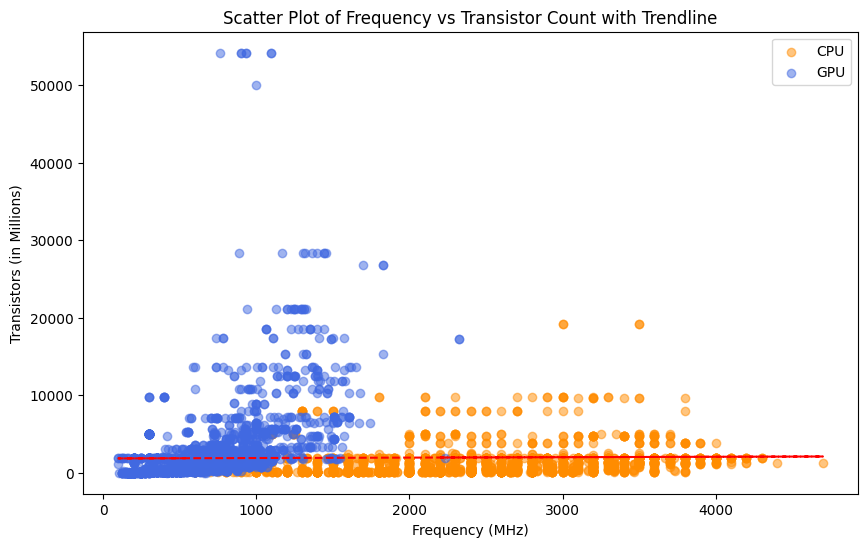

In [235]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Type'] == 'CPU']['Frequency'], df[df['Type'] == 'CPU']['Transistors'], alpha=0.5, color='darkorange', label='CPU')
plt.scatter(df[df['Type'] == 'GPU']['Frequency'], df[df['Type'] == 'GPU']['Transistors'], alpha=0.5, color='royalblue', label='GPU')

# General trendline
z = np.polyfit(df['Frequency'], df['Transistors'], 1)
p = np.poly1d(z)
plt.plot(df['Frequency'], p(df['Frequency']), "r--")

# Labels and title
plt.title('Scatter Plot of Frequency vs Transistor Count with Trendline')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Transistors (in Millions)')
plt.legend()
plt.show()

### ii. Process Size and Frequency

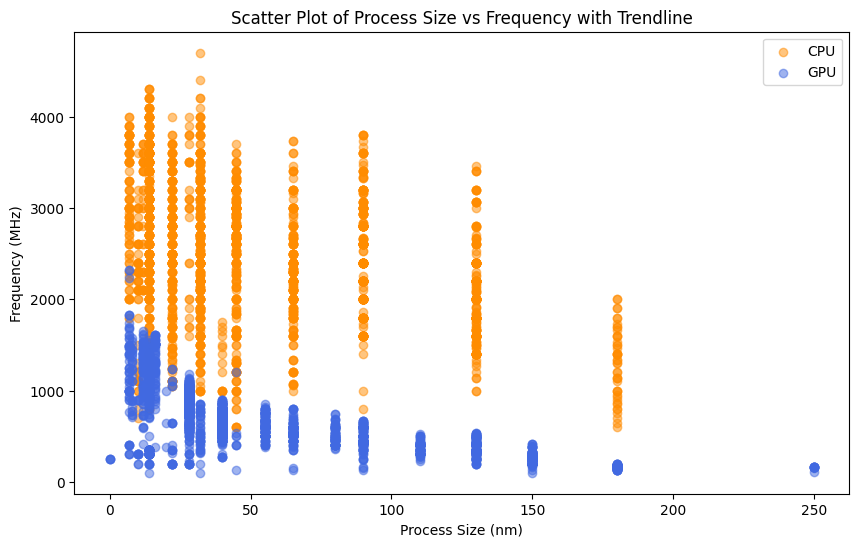

In [236]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Type'] == 'CPU']['Process_Size'], df[df['Type'] == 'CPU']['Frequency'], alpha=0.5, color='darkorange', label='CPU')
plt.scatter(df[df['Type'] == 'GPU']['Process_Size'], df[df['Type'] == 'GPU']['Frequency'], alpha=0.5, color='royalblue', label='GPU')

# Labels and title
plt.title('Scatter Plot of Process Size vs Frequency with Trendline')
plt.xlabel('Process Size (nm)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.show()

### iii. Die Size and Total Transistor Count

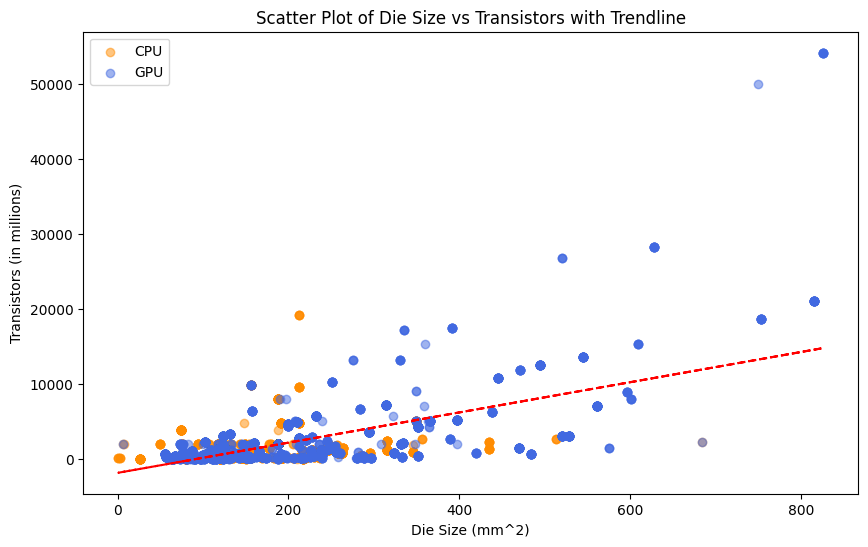

In [237]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Type'] == 'CPU']['Die_Size'], df[df['Type'] == 'CPU']['Transistors'], alpha=0.5, color='darkorange', label='CPU')
plt.scatter(df[df['Type'] == 'GPU']['Die_Size'], df[df['Type'] == 'GPU']['Transistors'], alpha=0.5, color='royalblue', label='GPU')

# Trendline for CPU
z_cpu = np.polyfit(df[df['Type'] == 'CPU']['Die_Size'], df[df['Type'] == 'CPU']['Transistors'], 1)
p_cpu = np.poly1d(z_cpu)
# General trendline
z = np.polyfit(df['Die_Size'], df['Transistors'], 1)
p = np.poly1d(z)
plt.plot(df['Die_Size'], p(df['Die_Size']), "r--")

# Labels and title
plt.title('Scatter Plot of Die Size vs Transistors with Trendline')
plt.xlabel('Die Size (mm^2)')
plt.ylabel('Transistors (in millions)')
plt.legend()
plt.show()

### iv. Thermal Design Power and Process Size

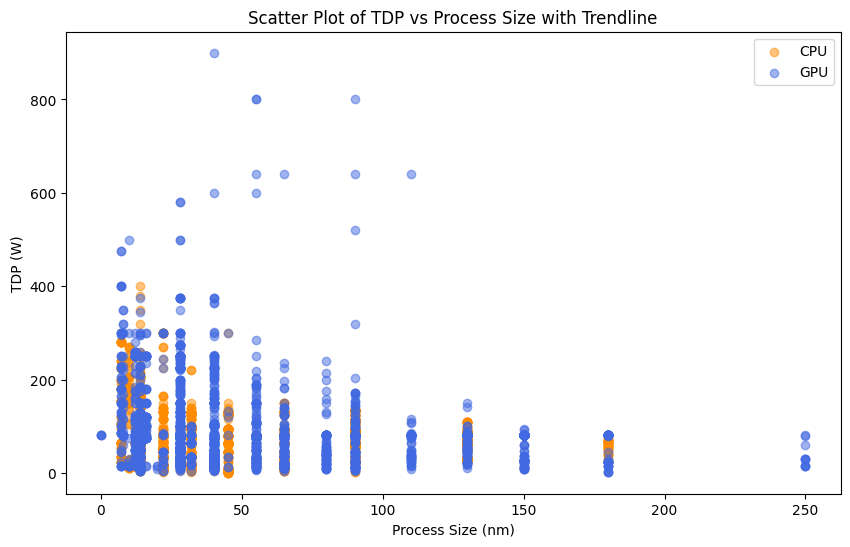

In [238]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Type'] == 'CPU']['Process_Size'], df[df['Type'] == 'CPU']['TDP'], alpha=0.5, color='darkorange', label='CPU')
plt.scatter(df[df['Type'] == 'GPU']['Process_Size'], df[df['Type'] == 'GPU']['TDP'], alpha=0.5, color='royalblue', label='GPU')

# Labels and title
plt.title('Scatter Plot of TDP vs Process Size with Trendline')
plt.xlabel('Process Size (nm)')
plt.ylabel('TDP (W)')
plt.legend()
plt.show()

### v. Total Transistor Count and Thermal Design Power

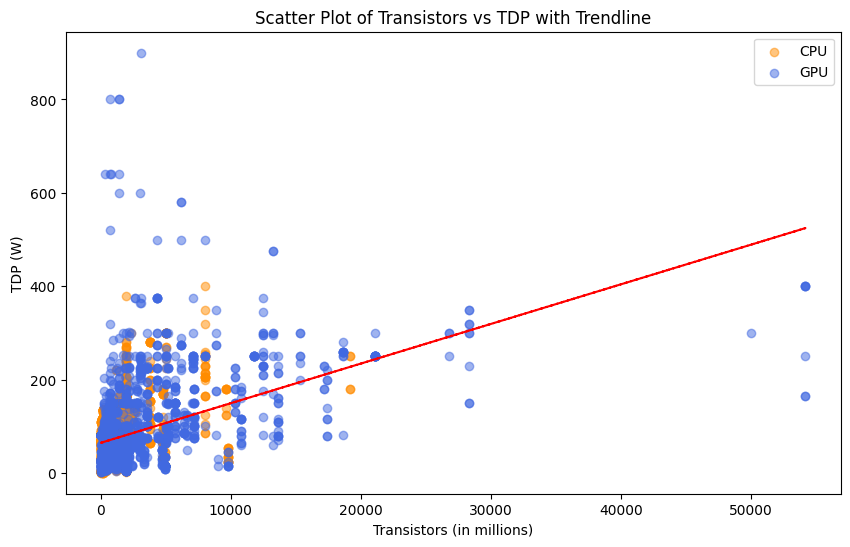

In [239]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Type'] == 'CPU']['Transistors'], df[df['Type'] == 'CPU']['TDP'], alpha=0.5, color='darkorange', label='CPU')
plt.scatter(df[df['Type'] == 'GPU']['Transistors'], df[df['Type'] == 'GPU']['TDP'], alpha=0.5, color='royalblue', label='GPU')

# General trendline
z = np.polyfit(df['Transistors'], df['TDP'], 1)
p = np.poly1d(z)
plt.plot(df['Transistors'], p(df['Transistors']), "r--")

# Labels and title
plt.title('Scatter Plot of Transistors vs TDP with Trendline')
plt.xlabel('Transistors (in millions)')
plt.ylabel('TDP (W)')
plt.legend()
plt.show()

### vi. Frequency and Thermal Design Power

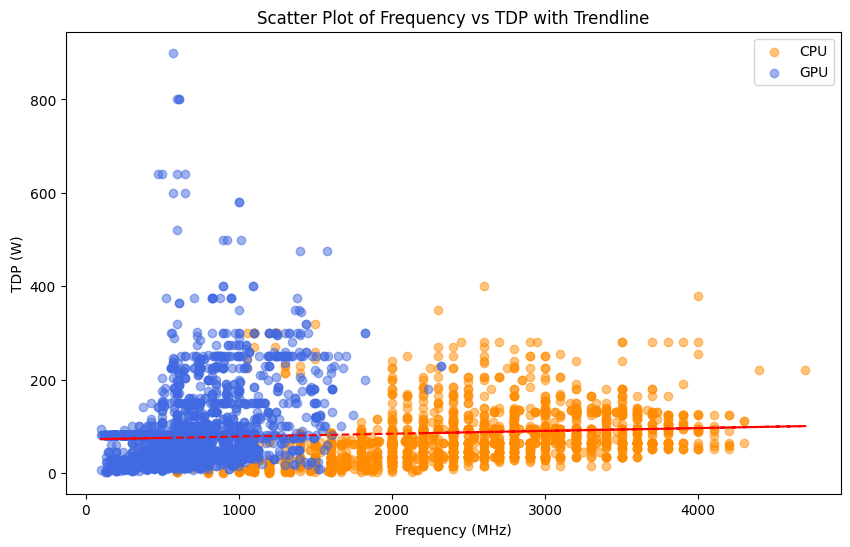

In [240]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Type'] == 'CPU']['Frequency'], df[df['Type'] == 'CPU']['TDP'], alpha=0.5, color='darkorange', label='CPU')
plt.scatter(df[df['Type'] == 'GPU']['Frequency'], df[df['Type'] == 'GPU']['TDP'], alpha=0.5, color='royalblue', label='GPU')

# General trendline
z = np.polyfit(df['Frequency'], df['TDP'], 1)
p = np.poly1d(z)
plt.plot(df['Frequency'], p(df['Frequency']), "r--")

# Labels and title
plt.title('Scatter Plot of Frequency vs TDP with Trendline')
plt.xlabel('Frequency (MHz)')
plt.ylabel('TDP (W)')
plt.legend()
plt.show()

# V. Comparative Analysis of CPU and GPU Foundries
<i>Compare performance and efficiency metrics across different foundries to highlight strengths and weaknesses based on key parameters.</i>
<hr>

## A. TDP by Foundry

### i. CPU Analysis

In [241]:
df_working.where(df_working['Type'] == 'CPU').groupby('Foundry')['TDP'].describe()

,count,mean,std,min,25%,50%,75%,max
Foundry,,,,,,,,
GF,93.0,83.333333,63.440032,15.0,35.0,65.0,125.0,250.0
Intel,1242.0,74.157005,59.050508,1.0,35.0,65.0,95.0,400.0
TSMC,97.0,136.453608,85.120261,25.0,65.0,120.0,200.0,280.0
Unknown,760.0,68.675000,30.026399,4.0,45.0,65.0,89.0,220.0


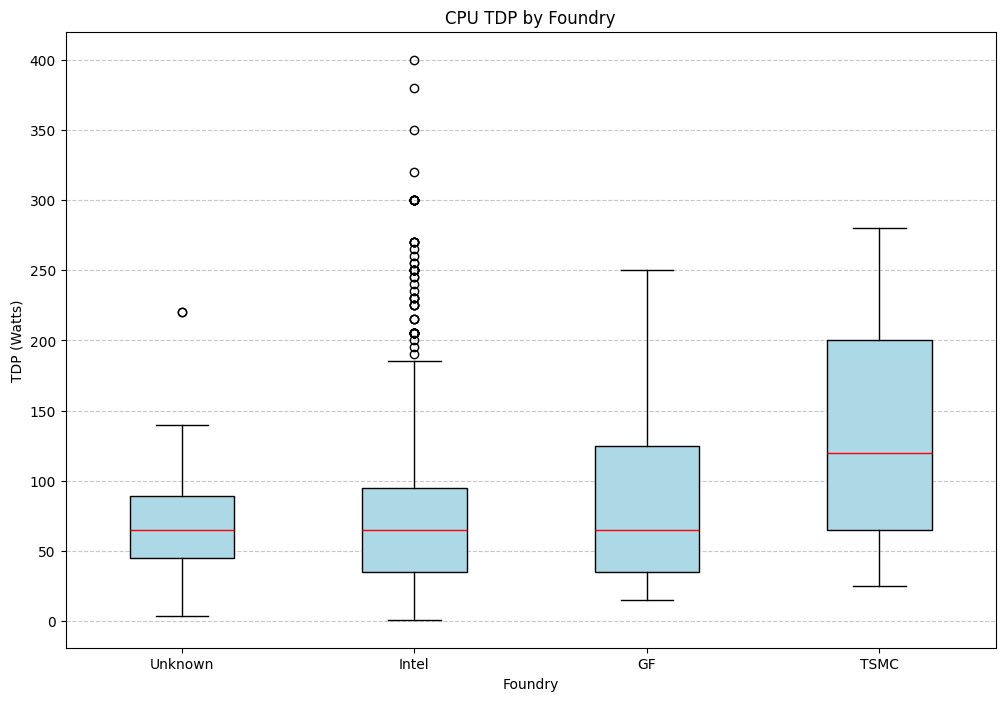

In [242]:
df_cpu = df[df_working["Type"] == "CPU"]

foundries = df_cpu["Foundry"].dropna().unique()

cpu_tdp = [df_cpu[df_cpu["Foundry"] == foundry]["TDP"].dropna() for foundry in foundries]

plt.figure(figsize=(12, 8))
plt.boxplot(cpu_tdp, positions=range(len(foundries)), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

plt.title("CPU TDP by Foundry")
plt.ylabel("TDP (Watts)")
plt.xlabel("Foundry")
plt.xticks(ticks=range(len(foundries)), labels=foundries, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### ii. GPU Analysis

In [243]:
df_working.where(df_working['Type'] == 'GPU').groupby('Foundry')['TDP'].describe()

,count,mean,std,min,25%,50%,75%,max
Foundry,,,,,,,,
GF,172.0,85.205581,77.074771,10.000000,30.500000,65.000000,120.000000,375.000000
IBM,3.0,81.359981,0.000000,81.359981,81.359981,81.359981,81.359981,81.359981
Intel,148.0,45.091619,74.116739,4.000000,15.000000,15.000000,45.000000,500.000000
NEC,2.0,45.000000,0.000000,45.000000,45.000000,45.000000,45.000000,45.000000
Renesas,1.0,33.000000,NaN,33.000000,33.000000,33.000000,33.000000,33.000000
Samsung,60.0,99.763332,94.938954,4.000000,30.000000,75.000000,121.250000,350.000000
Sony,10.0,45.000000,29.333333,4.000000,24.500000,45.000000,73.750000,80.000000
TSMC,2081.0,90.944580,86.129733,2.000000,35.000000,81.359981,100.000000,900.000000
UMC,79.0,68.378214,22.242275,15.000000,50.000000,81.359981,81.359981,81.359981


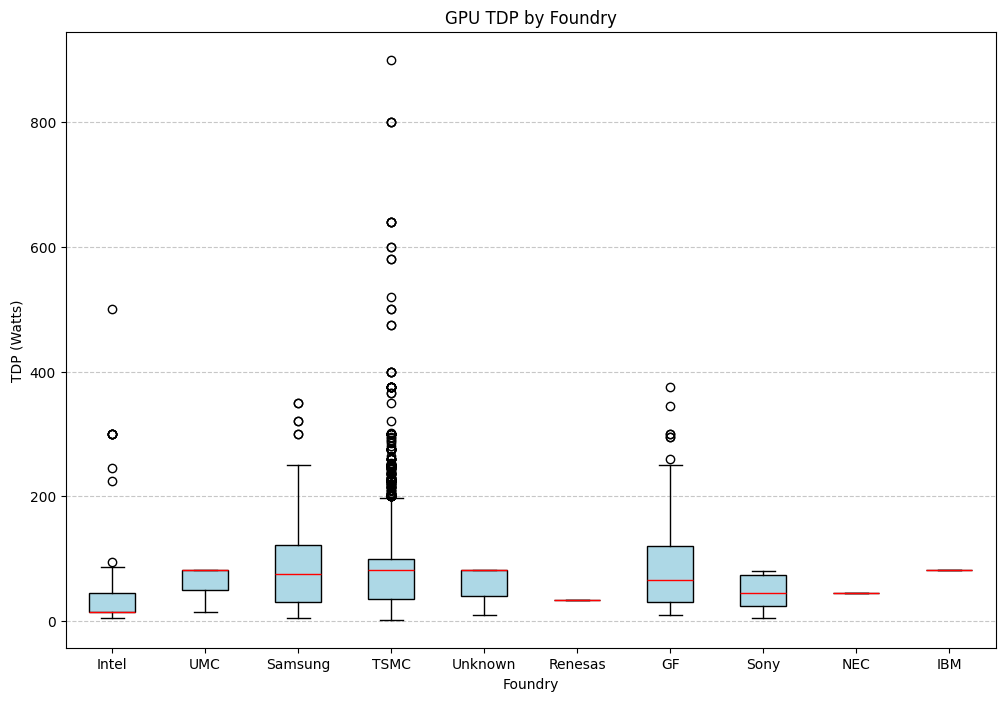

In [244]:
df_gpu = df[df_working["Type"] == "GPU"]

foundries = df_gpu["Foundry"].dropna().unique()

gpu_tdp = [df_gpu[df_gpu["Foundry"] == foundry]["TDP"].dropna() for foundry in foundries]

plt.figure(figsize=(12, 8))
plt.boxplot(gpu_tdp, positions=range(len(foundries)), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

plt.title("GPU TDP by Foundry")
plt.ylabel("TDP (Watts)")
plt.xlabel("Foundry")
plt.xticks(ticks=range(len(foundries)), labels=foundries, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


## B. Process Size by Foundry

### i. CPU Analysis

In [245]:
df_working.where(df_working['Type'] == 'CPU').groupby('Foundry')['Process_Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Foundry,,,,,,,,
GF,93.0,13.247312,0.974188,12.0,12.0,14.0,14.0,14.0
Intel,1242.0,42.500805,36.823714,10.0,14.0,32.0,65.0,180.0
TSMC,97.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0
Unknown,760.0,77.921053,40.591887,14.0,45.0,65.0,90.0,180.0


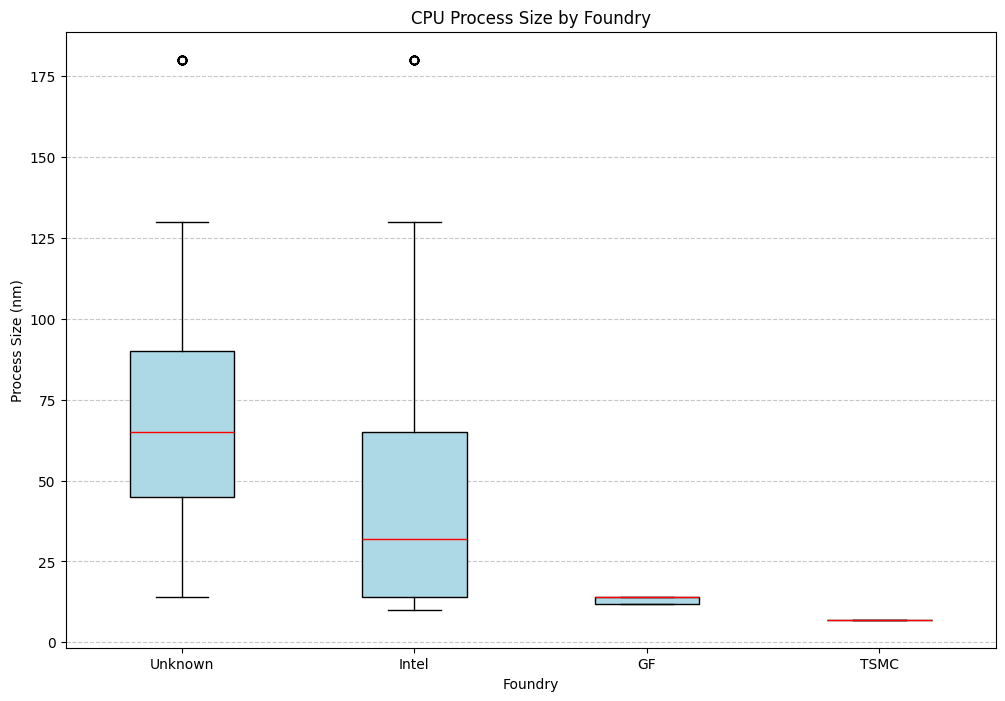

In [246]:
# Filter the dataframe for CPU Type
df_cpu = df_working[df_working['Type'] == 'CPU']

# Group by Foundry and get the process sizes
foundries = df_cpu['Foundry'].dropna().unique()
cpu_process_sizes = [df_cpu[df_cpu['Foundry'] == foundry]['Process_Size'].dropna() for foundry in foundries]

# Create the boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(cpu_process_sizes, positions=range(len(foundries)), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

# Add titles and labels
plt.title("CPU Process Size by Foundry")
plt.ylabel("Process Size (nm)")
plt.xlabel("Foundry")
plt.xticks(ticks=range(len(foundries)), labels=foundries, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### ii. GPU Analysis

In [247]:
df_working.where(df_working['Type'] == 'GPU').groupby('Foundry')['Process_Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Foundry,,,,,,,,
GF,172.0,15.697674,4.603761,12.0,14.0,14.0,14.00,28.0
IBM,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intel,148.0,35.500000,36.797201,10.0,14.0,14.0,35.25,150.0
NEC,2.0,135.000000,63.639610,90.0,112.5,135.0,157.50,180.0
Renesas,1.0,40.000000,NaN,40.0,40.0,40.0,40.00,40.0
Samsung,60.0,11.600000,4.013536,8.0,8.0,14.0,14.00,32.0
Sony,10.0,96.300000,67.923241,28.0,65.0,77.5,90.00,250.0
TSMC,2075.0,59.663133,45.773422,7.0,28.0,40.0,90.00,250.0
UMC,79.0,118.607595,44.598901,0.0,80.0,130.0,150.00,180.0


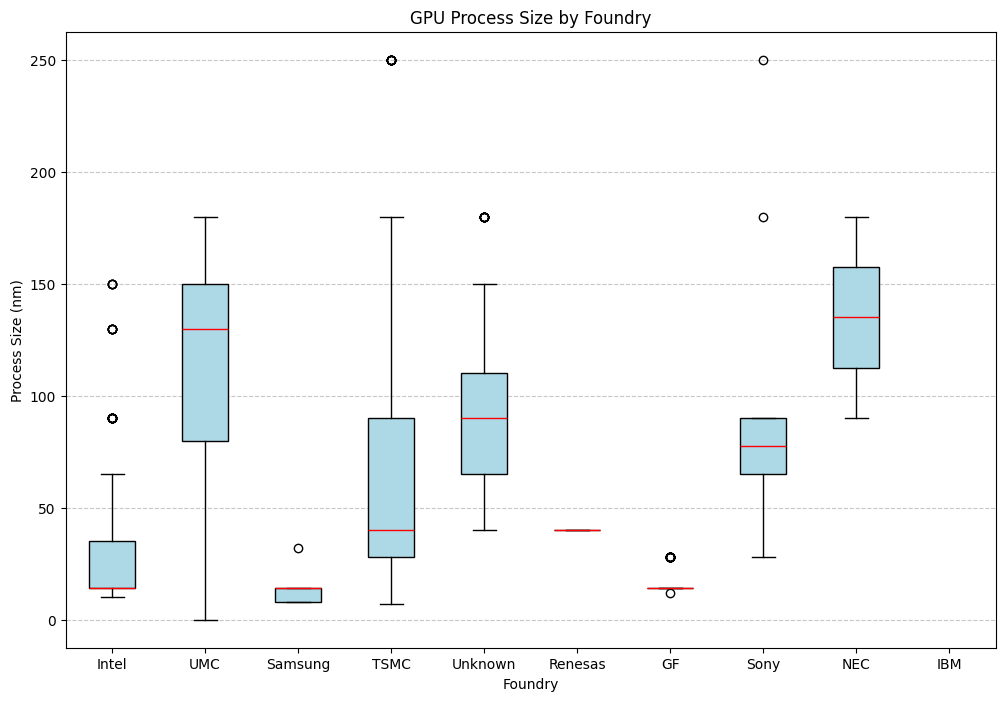

In [248]:
# Filter the dataframe for GPU Type
df_gpu = df_working[df_working['Type'] == 'GPU']

# Group by Foundry and get the process sizes
foundries = df_gpu['Foundry'].dropna().unique()
gpu_process_sizes = [df_gpu[df_gpu['Foundry'] == foundry]['Process_Size'].dropna() for foundry in foundries]

# Create the boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(gpu_process_sizes, positions=range(len(foundries)), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

# Add titles and labels
plt.title("GPU Process Size by Foundry")
plt.ylabel("Process Size (nm)")
plt.xlabel("Foundry")
plt.xticks(ticks=range(len(foundries)), labels=foundries, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## C. Frequency by Foundry

### i. CPU Analysis

In [249]:
df_working.where(df_working['Type'] == 'CPU').groupby('Foundry')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Foundry,,,,,,,,
GF,93.0,2905.376344,606.596992,2000.0,2300.0,3100.0,3500.0,3800.0
Intel,1242.0,2516.677939,785.331270,600.0,2000.0,2600.0,3100.0,4300.0
TSMC,97.0,3079.896907,596.328165,1800.0,2700.0,3000.0,3600.0,4000.0
Unknown,760.0,2298.343421,667.067283,600.0,1800.0,2200.0,2700.0,4700.0


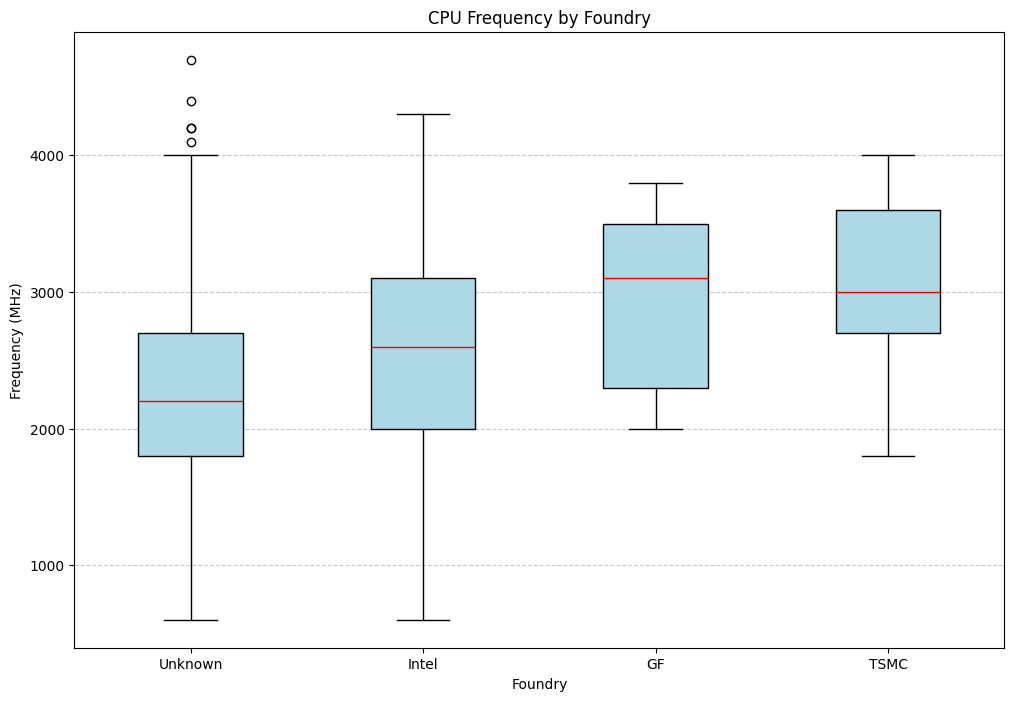

In [250]:
# Filter the dataframe for CPU Type
df_cpu = df_working[df_working['Type'] == 'CPU']

# Group by Foundry and get the frequencies
foundries = df_cpu['Foundry'].dropna().unique()
cpu_frequencies = [df_cpu[df_cpu['Foundry'] == foundry]['Frequency'].dropna() for foundry in foundries]

# Create the boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(cpu_frequencies, positions=range(len(foundries)), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

# Add titles and labels
plt.title("CPU Frequency by Foundry")
plt.ylabel("Frequency (MHz)")
plt.xlabel("Foundry")
plt.xticks(ticks=range(len(foundries)), labels=foundries, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### ii. GPU Analysis

In [251]:
df_working.where(df_working['Type'] == 'GPU').groupby('Foundry')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Foundry,,,,,,,,
GF,172.0,845.889535,379.444507,200.0,300.00,1000.0,1124.00,1469.0
IBM,3.0,130.000000,17.320508,120.0,120.00,120.0,135.00,150.0
Intel,148.0,405.114865,238.332287,100.0,300.00,350.0,400.00,1238.0
NEC,2.0,202.500000,57.275649,162.0,182.25,202.5,222.75,243.0
Renesas,1.0,550.000000,NaN,550.0,550.00,550.0,550.00,550.0
Samsung,60.0,1218.316667,277.876054,200.0,1110.00,1303.0,1415.00,1575.0
Sony,10.0,305.400000,210.587116,133.0,147.00,147.0,550.00,550.0
TSMC,2081.0,678.725132,308.026462,105.0,475.00,640.0,850.00,2321.0
UMC,79.0,326.708861,147.388911,125.0,240.00,250.0,450.00,635.0


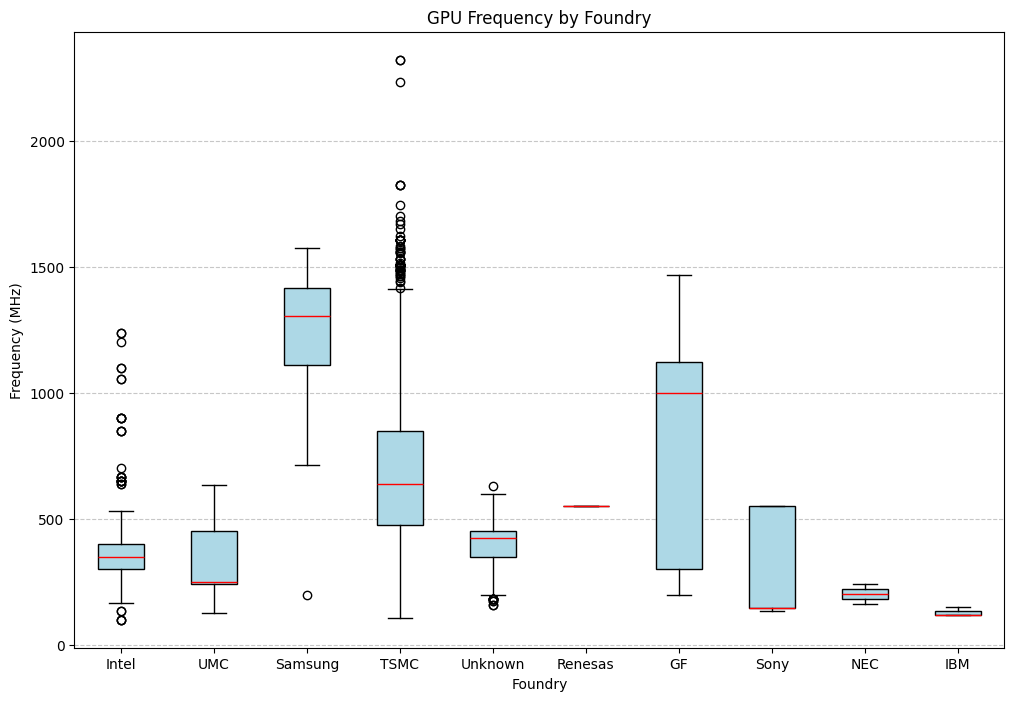

In [252]:
df_gpu = df_working[df_working['Type'] == 'GPU']

foundries = df_gpu['Foundry'].dropna().unique()
gpu_frequencies = [df_gpu[df_gpu['Foundry'] == foundry]['Frequency'].dropna() for foundry in foundries]

plt.figure(figsize=(12, 8))
plt.boxplot(gpu_frequencies, positions=range(len(foundries)), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

plt.title("GPU Frequency by Foundry")
plt.ylabel("Frequency (MHz)")
plt.xlabel("Foundry")
plt.xticks(ticks=range(len(foundries)), labels=foundries, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## D. Die Size by Foundry

### i. CPU Analysis

In [253]:
df_working.where(df_working['Type'] == 'CPU').groupby('Foundry')['Die_Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Foundry,,,,,,,,
GF,93.0,207.274447,16.044318,188.440445,192.0,210.000000,213.000000,246.000000
Intel,1242.0,160.735201,69.125433,6.000000,112.0,160.000000,188.440445,684.000000
TSMC,97.0,132.358112,53.512602,74.000000,74.0,156.000000,188.440445,188.440445
Unknown,760.0,190.660443,70.965536,1.000000,126.0,188.440445,246.000000,346.000000


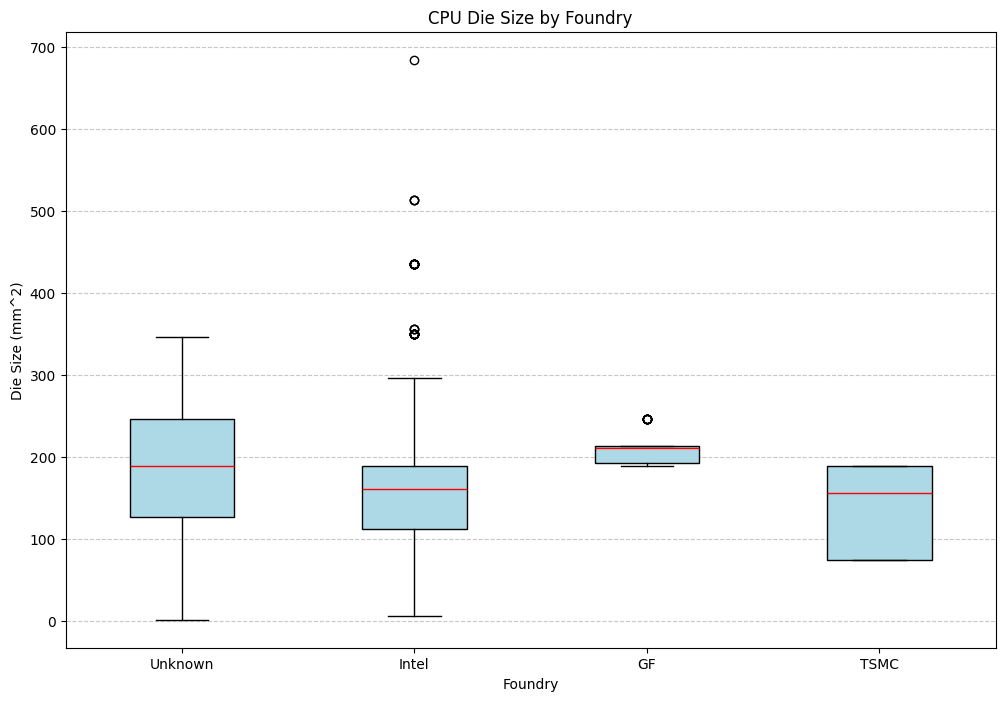

In [254]:
# Filter the dataframe for CPU Type
df_cpu = df_working[df_working['Type'] == 'CPU']

# Group by Foundry and get the die sizes
foundries = df_cpu['Foundry'].dropna().unique()
cpu_die_sizes = [df_cpu[df_cpu['Foundry'] == foundry]['Die_Size'].dropna() for foundry in foundries]

# Create the boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(cpu_die_sizes, positions=range(len(foundries)), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

# Add titles and labels
plt.title("CPU Die Size by Foundry")
plt.ylabel("Die Size (mm^2)")
plt.xlabel("Foundry")
plt.xticks(ticks=range(len(foundries)), labels=foundries, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### ii. GPU Analysis

In [255]:
df_working.where(df_working['Type'] == 'GPU').groupby('Foundry')['Die_Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Foundry,,,,,,,,
GF,172.0,208.435354,113.625746,103.0,123.000000,210.000000,232.000000,495.000000
IBM,3.0,156.000000,0.000000,156.0,156.000000,156.000000,156.000000,156.000000
Intel,148.0,183.765180,63.390120,62.0,188.440445,188.440445,188.440445,684.000000
NEC,2.0,107.500000,17.677670,95.0,101.250000,107.500000,113.750000,120.000000
Renesas,1.0,146.000000,NaN,146.0,146.000000,146.000000,146.000000,146.000000
Samsung,60.0,242.118052,191.549062,6.0,132.000000,132.000000,392.000000,628.000000
Sony,10.0,164.188089,73.181143,68.0,93.000000,187.000000,188.440445,279.000000
TSMC,2081.0,209.188319,150.605432,56.0,104.000000,154.000000,287.000000,826.000000
UMC,79.0,145.503454,42.545461,81.0,100.000000,174.000000,188.440445,188.440445


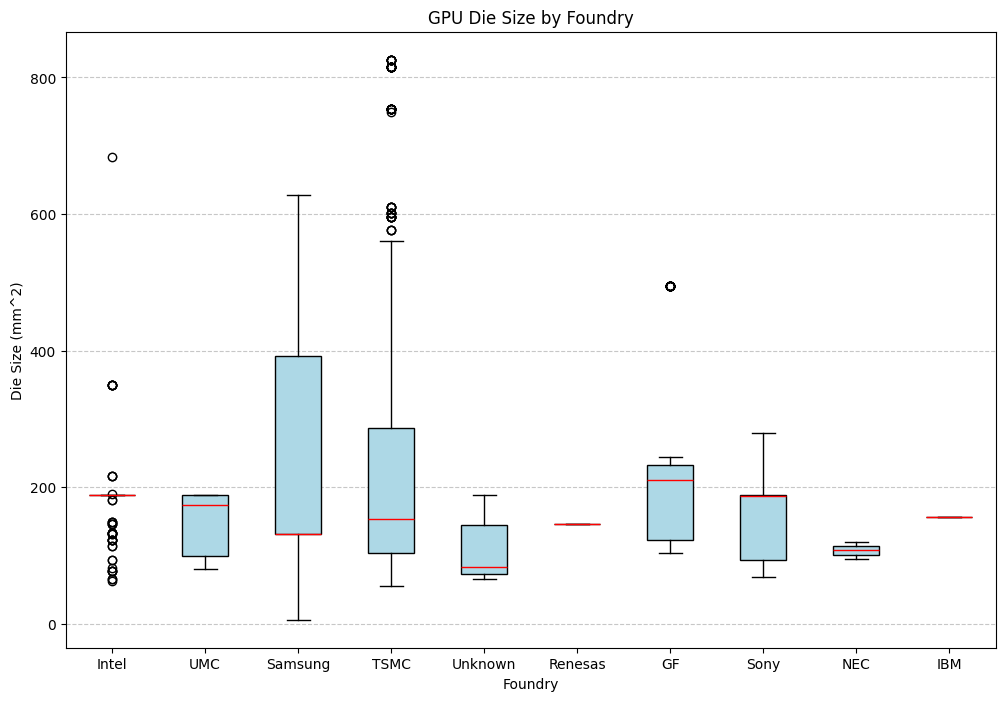

In [256]:
df_gpu = df_working[df_working['Type'] == 'GPU']

foundries = df_gpu['Foundry'].dropna().unique()
gpu_die_sizes = [df_gpu[df_gpu['Foundry'] == foundry]['Die_Size'].dropna() for foundry in foundries]

plt.figure(figsize=(12, 8))
plt.boxplot(gpu_die_sizes, positions=range(len(foundries)), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

plt.title("GPU Die Size by Foundry")
plt.ylabel("Die Size (mm^2)")
plt.xlabel("Foundry")
plt.xticks(ticks=range(len(foundries)), labels=foundries, rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Conclusion

## A. Market Overview
### Chip Production by Vendor
The CPU market is dominated by Intel and AMD, although recent trends suggest a potential shift with AMD gaining traction. The GPU market is heavily reliant on NVIDIA, with AMD as a significant competitor. Both markets exhibit fluctuations in production volumes over time, reflecting market dynamics and strategic decisions.

### Chip Production Volumes by Foundry
The foundry landscape reveals a concentration of production among a few key players. TSMC stands out as the dominant foundry for both CPUs and GPUs, particularly in the GPU market. Intel also maintains a significant presence in CPU manufacturing. The "Unknown" category suggests a substantial portion of production comes from smaller or unreported foundries.

### Vendor-Based Market Trend
Vendor market trends show a dynamic landscape with competition and shifts in market share. Understanding these vendor-specific trends is crucial for assessing the overall health and direction of the CPU and GPU markets.

### Foundry-Based Production Trend
Foundry-based trends highlight the importance of leading-edge manufacturing capabilities. TSMC's dominance, particularly in GPUs, emphasizes the crucial role of advanced process nodes in this market.

## B. TDP Market Analysis

### TDP Distribution in CPU
CPU TDP distribution varies significantly across foundries, with Intel exhibiting a wide range and high outliers, suggesting a focus on both power efficiency and high-performance segments. TSMC also shows a considerable range, while GF and "Unknown" lean towards lower TDPs.

### TDP Distribution in GPU
 GPU TDP distribution reveals a similar pattern, with TSMC showing the widest range and highest TDP outliers, reflecting the power demands of high-performance GPUs. Other foundries cater to a range of TDPs, with some specializing in lower-power GPUs.

## C. Trend Analysis in CPU and GPU Production

### Process Size
Both CPU and GPU process sizes have consistently decreased over time, reflecting advancements in semiconductor technology. However, the rate of reduction has slowed in recent years, hinting at challenges in further miniaturization.

###	Die Size, Transistor Count, and Transistor Density
GPU die sizes have generally increased, driven by the demand for more transistors and parallel processing power. CPU die sizes have fluctuated more, reflecting architectural changes. While total transistor counts may be plateauing, transistor density continues to increase for both CPUs and GPUs, highlighting the importance of efficient packing.

### Frequency
Both CPU and GPU frequencies increased initially but have plateaued or even slightly declined in recent years, suggesting limitations due to power and thermal constraints.

### TDP
CPU TDP trends are complex and show fluctuations, indicating challenges in balancing power consumption and performance. GPU TDP has generally increased, reflecting the higher power demands of these processors.

## D. Correlation Analysis of CPU and GPU Parameters

###	Frequency and Total Transistor Count
For CPUs, there's a weak positive correlation between frequency and transistor count. No clear correlation exists for GPUs.

###	Process Size and Frequency
CPUs show a negative correlation between process size and frequency. The relationship is less clear for GPUs.

###	Die Size and Total Transistor Count
Both CPUs and GPUs show a positive correlation, with GPUs exhibiting a stronger relationship.

###	Thermal Design Power and Process Size
CPUs show a weak negative correlation. No clear correlation exists for GPUs.

###	Total Transistor Count and Thermal Design Power
Both CPUs and GPUs show a positive correlation, with GPUs exhibiting a stronger relationship.

###	Frequency and Thermal Design Power
CPUs show a weak positive correlation. No clear correlation exists for GPUs.

## E. Comparative Analysis of CPU and GPU Foundries
### TDP by Foundry: 
Foundries exhibit distinct TDP profiles, reflecting their target markets and manufacturing specializations. Intel and TSMC cater to a wide range of CPU TDPs, including high-performance parts, while others focus on lower TDPs. In GPUs, TSMC stands out with the widest range and highest TDPs.

### Process Size by Foundry
TSMC and GF are at the forefront of CPU process size technology, while Intel also produces CPUs across a wider range of process nodes. Similar trends are seen in GPUs, with TSMC and Samsung leading in smaller process nodes.

### Frequency by Foundry
TSMC CPUs show the highest median frequencies. In GPUs, Samsung and TSMC lead in frequency.

### Die Size by Foundry
GPU die sizes vary significantly by foundry, with TSMC producing the widest range, including some very large chips. CPU die size variation is also observed, with GF and TSMC focusing on smaller, more consistent die sizes.

# Recommendations

## A.	Market Overview
### i.Vendor Diversification: 
Explore partnerships with emerging vendors and smaller foundries to reduce reliance on dominant players.

### ii.Production Monitoring: 
Monitor production volumes and market trends to respond proactively to changes.

## B.	TDP Market Analysis
### i.	Efficiency Optimization: 
Develop CPUs and GPUs with lower TDPs without compromising performance.

### ii.	Targeted Development: 
Tailor product development to address specific TDP ranges preferred by different market segments.

## C.	Trend Analysis in CPU and GPU Production
### i.	Process Innovation:
Invest in R&D to overcome challenges in reducing process sizes.

### ii.	Density Maximization: 
Prioritize advancements in transistor density for enhanced performance.

### iii. Thermal Solutions: 
Develop innovative thermal management solutions to address frequency and TDP challenges.

## D.	Correlation Analysis of CPU and GPU Parameters
### i.	Design Optimization:
Optimize CPU and GPU designs by balancing frequency, transistor count, and TDP.
### ii.	Process-Performance Balance: 
Achieve an optimal balance between process size and frequency.

## E.	Comparative Analysis of CPU and GPU Foundries
### i.	Foundry Collaboration: 
Strengthen collaborations with leading foundries to leverage advanced manufacturing capabilities.
### ii.	Performance Benchmarking: 
Regularly benchmark key metrics across foundries to identify areas for improvement.
